## LOADING IMPORTANT LIBRARIES

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading train and test data

In [9]:
train = pd.read_csv("train.csv")

### COLUMN DESCRIPTION

UniqueID : Identifier for customers

loan_default:Payment default in the first EMI on due date

disbursed_amount:Amount of Loan disbursed

asset_cost:Cost of the Asset

ltv:Loan to Value of the asset

branch_id:Branch where the loan was disbursed

supplier_id:Vehicle Dealer where the loan was disbursed

manufacturer_id:Vehicle manufacturer(Hero, Honda, TVS etc.)

Current_pincode:Current pincode of the customer

Date.of.Birth:Date of birth of the customer

Employment.Type:Employment Type of the customer (Salaried/Self Employed)

DisbursalDate:Date of disbursement

State_ID:State of disbursement

Employee_code_ID:Employee of the organization who logged the disbursement

MobileNo_Avl_Flag:if Mobile no. was shared by the customer then flagged as 1

Aadhar_flag:if aadhar was shared by the customer then flagged as 1

PAN_flag:if pan was shared by the customer then flagged as 1

VoterID_flag:if voter was shared by the customer then flagged as 1

Driving_flag:if DL was shared by the customer then flagged as 1

Passport_flag:if passport was shared by the customer then flagged as 1

PERFORM_CNS.SCORE:Bureau Score

PERFORM_CNS.SCORE.DESCRIPTION:Bureau score description

PRI.NO.OF.ACCTS:count of total loans taken by the customer at the time of disbursement
Primary accounts are those which the customer has taken for his personal use

PRI.ACTIVE.ACCTS:count of active loans taken by the customer at the time of disbursement

PRI.OVERDUE.ACCTS:count of default accounts at the time of disbursement

PRI.CURRENT.BALANCE:total Principal outstanding amount of the active loans at the time of disbursement

PRI.SANCTIONED.AMOUNT:total amount that was sanctioned for all the loans at the time of disbursement

PRI.DISBURSED.AMOUNT:total amount that was disbursed for all the loans at the time of disbursement

SEC.NO.OF.ACCTS:count of total loans taken by the customer at the time of disbursement
Secondary accounts are those which the customer act as a co-applicant or gaurantor

SEC.ACTIVE.ACCTS:count of active loans taken by the customer at the time of disbursement

SEC.OVERDUE.ACCTS:count of default accounts at the time of disbursement

SEC.CURRENT.BALANCE:total Principal outstanding amount of the active loans at the time of disbursement

SEC.SANCTIONED.AMOUNT:total amount that was sanctioned for all the loans at the time of disbursement

SEC.DISBURSED.AMOUNT:total amount that was disbursed for all the loans at the time of disbursement

PRIMARY.INSTAL.AMT:EMI Amount of the primary loan

SEC.INSTAL.AMT:EMI Amount of the secondary loan

NEW.ACCTS.IN.LAST.SIX.MONTHS:New loans taken by the customer in last 6 months before the disbursment

DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS:Loans defaulted in the last 6 months

AVERAGE.ACCT.AGE:Average loan tenure

CREDIT.HISTORY:LENGTH:Time since first loan

NO.OF_INQUIRIES:Enquries done by the customer for loans

## DATA CLEANING EXPLORATORY DATA ANALYSIS

## We will learn basic EDA and data cleaning needed to be done and in this part we will understand EDA of each features


### shape of data


In [10]:
train.shape

(233154, 41)

### columns

In [11]:
len(train.columns)

41

### snapshot of data

In [12]:
train.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


### data types and info of data

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

### summary of data

In [14]:
train.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


In [15]:
train[train["disbursed_amount"]<=60413.000000].shape

(174947, 41)

In [16]:
174947/233154

0.7503495543717886

In [17]:
### CHECKING NULL
train.isna().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

### filtering out categorical values

In [18]:
for col in train.columns:
    if train[col].dtypes == "object":
        print(col)

Date.of.Birth
Employment.Type
DisbursalDate
PERFORM_CNS.SCORE.DESCRIPTION
AVERAGE.ACCT.AGE
CREDIT.HISTORY.LENGTH


In [19]:
cat_cols = [x for x in train.columns if train[x].dtypes == "object"]
id_cols = [x for x in train.columns if "id" in x.lower() and "flag" not in x]
num_cols = [x for x in train.columns if train[x].dtypes != "object" and x not in id_cols and x!="loan_default"]

In [20]:
id_cols

['UniqueID',
 'branch_id',
 'supplier_id',
 'manufacturer_id',
 'Current_pincode_ID',
 'State_ID',
 'Employee_code_ID']

In [21]:
cat_cols

['Date.of.Birth',
 'Employment.Type',
 'DisbursalDate',
 'PERFORM_CNS.SCORE.DESCRIPTION',
 'AVERAGE.ACCT.AGE',
 'CREDIT.HISTORY.LENGTH']

In [22]:
len(num_cols)

27

### filtering out target column

In [23]:
train["loan_default"]

0         0
1         1
2         0
3         1
4         1
         ..
233149    0
233150    0
233151    0
233152    0
233153    0
Name: loan_default, Length: 233154, dtype: int64

In [24]:
# % of loan defaulters
train["loan_default"].value_counts(normalize=True)*100

0    78.292888
1    21.707112
Name: loan_default, dtype: float64

### CATEGORICAL COLUMNS

#### State_ID

In [25]:
# Unique type of state_ids
train["State_ID"].unique()

array([ 6,  4,  3,  9,  5, 10, 18, 15,  1, 16, 13, 14, 17,  2, 11,  7, 12,
        8, 20, 19, 22, 21])

In [26]:
# distinct count of each State_ID
train["State_ID"].value_counts()

4     44870
3     34078
6     33505
13    17884
9     16022
8     14197
5     10177
14     9414
1      8936
7      6786
11     6721
18     5412
15     5049
12     4210
2      4160
17     3991
10     3605
16     2685
19     1035
20      185
21      156
22       76
Name: State_ID, dtype: int64

In [27]:
pd.crosstab(columns=train["loan_default"],index=train["State_ID"],values=train["UniqueID"],aggfunc="count",margins=True,margins_name="total")

loan_default,0,1,total
State_ID,,,
1,7353,1583,8936
2,3031,1129,4160
3,27733,6345,34078
4,35544,9326,44870
5,8154,2023,10177
6,26615,6890,33505
7,5417,1369,6786
8,10939,3258,14197
9,12530,3492,16022


In [28]:
pd.crosstab(columns=train["loan_default"],index=train["State_ID"],values=train["UniqueID"],aggfunc="count",margins=True,normalize="index",
            margins_name="total")

loan_default,0,1
State_ID,,
1,0.822851,0.177149
2,0.728606,0.271394
3,0.813809,0.186191
4,0.792155,0.207845
5,0.801218,0.198782
6,0.794359,0.205641
7,0.798261,0.201739
8,0.770515,0.229485
9,0.782050,0.217950


#### Employment.Type

In [29]:
# Unique type of Employment.Type
train["Employment.Type"].unique()

array(['Salaried', 'Self employed', nan], dtype=object)

In [30]:
# distinct count of each employment type
train["Employment.Type"].value_counts()

Self employed    127635
Salaried          97858
Name: Employment.Type, dtype: int64

In [31]:
pd.crosstab(columns=train["loan_default"],index=train["Employment.Type"],values=train["UniqueID"],aggfunc="count",margins=True,margins_name="total")

loan_default,0,1,total
Employment.Type,,,
Salaried,77948,19910,97858
Self employed,98578,29057,127635
total,176526,48967,225493


In [32]:
pd.crosstab(columns=train["loan_default"],index=train["Employment.Type"],values=train["UniqueID"],aggfunc="count",margins=True,margins_name="total",normalize="index")

loan_default,0,1
Employment.Type,,
Salaried,0.796542,0.203458
Self employed,0.772343,0.227657
total,0.782845,0.217155


<AxesSubplot:xlabel='Employment.Type'>

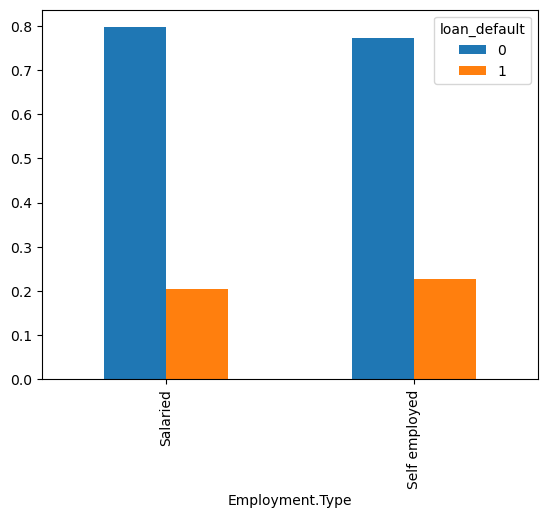

In [33]:
pd.crosstab(columns=train["loan_default"],index=train["Employment.Type"],values=train["UniqueID"],aggfunc="count",normalize="index").plot(kind="bar")

In [34]:
### default rate of nulls
train[pd.isna(train["Employment.Type"])]["loan_default"].mean()

0.2145933951181308

#### DisbursalDate

In [35]:
train["DisbursalDate"]

0         03-08-18
1         26-09-18
2         01-08-18
3         26-10-18
4         26-09-18
            ...   
233149    26-10-18
233150    23-10-18
233151    24-10-18
233152    29-09-18
233153    27-10-18
Name: DisbursalDate, Length: 233154, dtype: object

In [36]:
train["DisbursalDate"]  = pd.to_datetime(train["DisbursalDate"],dayfirst=True)

In [37]:
train["Disbursal_Month"] = train["DisbursalDate"].apply(lambda x:pd.to_datetime(str(x.year)+"-"+str(x.month)+"-"+"1"))

In [38]:
pd.crosstab(columns=train["loan_default"],index=train["Disbursal_Month"],values=train["UniqueID"],aggfunc="count",margins=True,margins_name="total")

loan_default,0,1,total
Disbursal_Month,,,
2018-08-01 00:00:00,53336,14666,68002
2018-09-01 00:00:00,53973,12815,66788
2018-10-01 00:00:00,75234,23130,98364
total,182543,50611,233154


In [39]:
pd.crosstab(columns=train["loan_default"],index=train["Disbursal_Month"],values=train["UniqueID"],aggfunc="count",margins=True,margins_name="total",normalize="index")

loan_default,0,1
Disbursal_Month,,
2018-08-01 00:00:00,0.784330,0.215670
2018-09-01 00:00:00,0.808124,0.191876
2018-10-01 00:00:00,0.764853,0.235147
total,0.782929,0.217071


<AxesSubplot:xlabel='Disbursal_Month'>

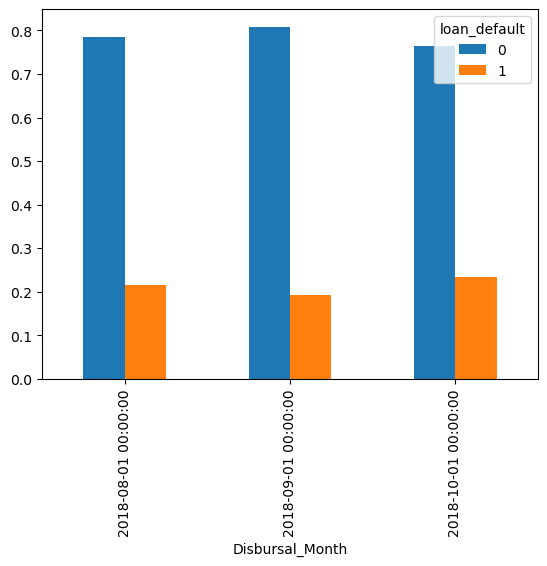

In [40]:
pd.crosstab(columns=train["loan_default"],index=train["Disbursal_Month"],values=train["UniqueID"],aggfunc="count",normalize="index").plot(kind="bar")


### Date.of.Birth

In [41]:
### we will calcuate age at the time of loan disbusred
train["age_at_the_time_of_loan_taken"] = train.apply(lambda x:int(((x["DisbursalDate"]-pd.to_datetime(x["Date.of.Birth"]))/np.timedelta64(1, 'Y'))),axis=1)

In [42]:
train["age_at_the_time_of_loan_taken"]

0         34
1         33
2         32
3         24
4         41
          ..
233149    30
233150    30
233151    42
233152    24
233153    34
Name: age_at_the_time_of_loan_taken, Length: 233154, dtype: int64

In [43]:
train["age_group"] = pd.cut(train["age_at_the_time_of_loan_taken"],bins = [np.NINF,0,21,30,35,40,45,np.PINF])

In [44]:
train["age_group"]

0         (30.0, 35.0]
1         (30.0, 35.0]
2         (30.0, 35.0]
3         (21.0, 30.0]
4         (40.0, 45.0]
              ...     
233149    (21.0, 30.0]
233150    (21.0, 30.0]
233151    (40.0, 45.0]
233152    (21.0, 30.0]
233153    (30.0, 35.0]
Name: age_group, Length: 233154, dtype: category
Categories (7, interval[float64, right]): [(-inf, 0.0] < (0.0, 21.0] < (21.0, 30.0] < (30.0, 35.0] < (35.0, 40.0] < (40.0, 45.0] < (45.0, inf]]

In [45]:
pd.crosstab(columns=train["loan_default"],index=train["age_group"],values=train["UniqueID"],
            aggfunc="count",margins=True,margins_name="total")

loan_default,0,1,total
age_group,,,
"(-inf, 0.0]",28248,6915,35163.0
"(0.0, 21.0]",10530,3527,14057.0
"(21.0, 30.0]",68523,20286,88809.0
"(30.0, 35.0]",30801,8404,39205.0
"(35.0, 40.0]",24683,6470,31153.0
"(40.0, 45.0]",19758,5009,24767.0
"(45.0, inf]",0,0,NaN
total,182543,50611,233154.0


In [46]:
pd.crosstab(columns=train["loan_default"],index=train["age_group"],
            values=train["UniqueID"],aggfunc="count",margins=True,margins_name="total",normalize="index")

loan_default,0,1
age_group,,
"(-inf, 0.0]",0.803344,0.196656
"(0.0, 21.0]",0.749093,0.250907
"(21.0, 30.0]",0.771577,0.228423
"(30.0, 35.0]",0.785640,0.214360
"(35.0, 40.0]",0.792315,0.207685
"(40.0, 45.0]",0.797755,0.202245
"(45.0, inf]",0.000000,0.000000
total,0.782929,0.217071


<AxesSubplot:xlabel='age_group'>

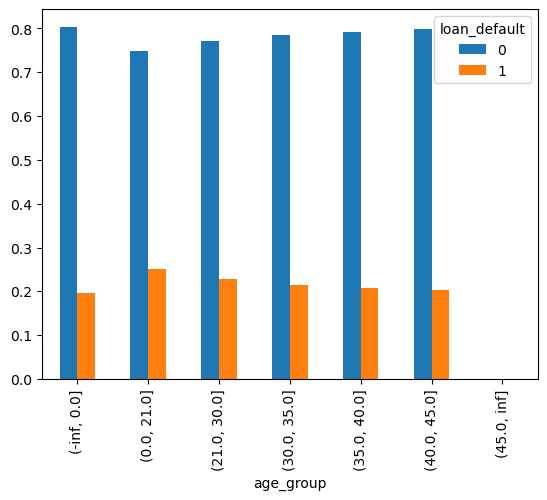

In [47]:
pd.crosstab(columns=train["loan_default"],index=train["age_group"],
            values=train["UniqueID"],aggfunc="count",normalize="index").plot(kind="bar")

#### PERFORM_CNS.SCORE.DESCRIPTION


In [48]:
train["PERFORM_CNS.SCORE.DESCRIPTION"]

0         No Bureau History Available
1                       I-Medium Risk
2         No Bureau History Available
3                    L-Very High Risk
4         No Bureau History Available
                     ...             
233149                D-Very Low Risk
233150                A-Very Low Risk
233151    No Bureau History Available
233152    No Bureau History Available
233153    No Bureau History Available
Name: PERFORM_CNS.SCORE.DESCRIPTION, Length: 233154, dtype: object

In [49]:
# unique count of PERFORM_CNS.SCORE.DESCRIPTION
train["PERFORM_CNS.SCORE.DESCRIPTION"].unique()

array(['No Bureau History Available', 'I-Medium Risk', 'L-Very High Risk',
       'A-Very Low Risk',
       'Not Scored: Not Enough Info available on the customer',
       'D-Very Low Risk', 'M-Very High Risk', 'B-Very Low Risk',
       'C-Very Low Risk', 'E-Low Risk', 'H-Medium Risk', 'F-Low Risk',
       'K-High Risk',
       'Not Scored: No Activity seen on the customer (Inactive)',
       'Not Scored: Sufficient History Not Available',
       'Not Scored: No Updates available in last 36 months', 'G-Low Risk',
       'J-High Risk', 'Not Scored: Only a Guarantor',
       'Not Scored: More than 50 active Accounts found'], dtype=object)

In [50]:
# nunique count of PERFORM_CNS.SCORE.DESCRIPTION
train["PERFORM_CNS.SCORE.DESCRIPTION"].nunique()

20

In [51]:
# unique count of PERFORM_CNS.SCORE.DESCRIPTION in each categories
pd.crosstab(columns=train["loan_default"],index=train["PERFORM_CNS.SCORE.DESCRIPTION"],values=train["UniqueID"],
            aggfunc="count",margins=True,margins_name="total")

loan_default,0,1,total
PERFORM_CNS.SCORE.DESCRIPTION,,,
A-Very Low Risk,11783.0,2341.0,14124
B-Very Low Risk,7993.0,1208.0,9201
C-Very Low Risk,13275.0,2770.0,16045
D-Very Low Risk,9659.0,1699.0,11358
E-Low Risk,4821.0,1000.0,5821
F-Low Risk,6905.0,1580.0,8485
G-Low Risk,3202.0,786.0,3988
H-Medium Risk,5197.0,1658.0,6855
I-Medium Risk,4042.0,1515.0,5557


In [52]:
# unique count of PERFORM_CNS.SCORE.DESCRIPTION in each categories
pd.crosstab(columns=train["loan_default"],index=train["PERFORM_CNS.SCORE.DESCRIPTION"],
            values=train["UniqueID"],
            aggfunc="count",normalize="index").sort_values(by=1,ascending=False)

loan_default,0,1
PERFORM_CNS.SCORE.DESCRIPTION,,
M-Very High Risk,0.695419,0.304581
L-Very High Risk,0.719577,0.280423
K-High Risk,0.721880,0.278120
I-Medium Risk,0.727371,0.272629
Not Scored: Sufficient History Not Available,0.744223,0.255777
J-High Risk,0.747599,0.252401
H-Medium Risk,0.758133,0.241867
No Bureau History Available,0.768687,0.231313
Not Scored: Only a Guarantor,0.786885,0.213115


<AxesSubplot:ylabel='PERFORM_CNS.SCORE.DESCRIPTION'>

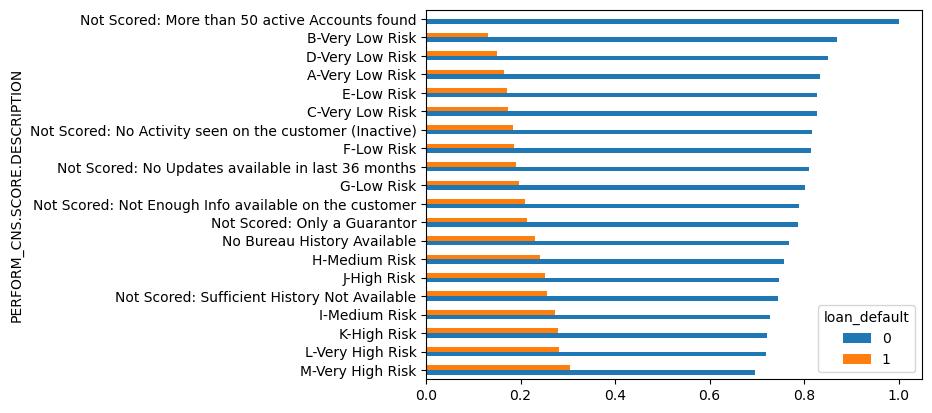

In [53]:
# unique count of PERFORM_CNS.SCORE.DESCRIPTION in each categories
pd.crosstab(columns=train["loan_default"],index=train["PERFORM_CNS.SCORE.DESCRIPTION"],
            values=train["UniqueID"],
            aggfunc="count",normalize="index").sort_values(by=1,ascending=False).plot(kind="barh")

#### 'AVERAGE.ACCT.AGE'

In [54]:
train["AVERAGE.ACCT.AGE"]

0          0yrs 0mon
1         1yrs 11mon
2          0yrs 0mon
3          0yrs 8mon
4          0yrs 0mon
             ...    
233149     1yrs 9mon
233150     0yrs 6mon
233151     0yrs 0mon
233152     0yrs 0mon
233153     0yrs 0mon
Name: AVERAGE.ACCT.AGE, Length: 233154, dtype: object

In [55]:
int("1yrs 11mon".split(" ")[0].split("yrs")[0])*12+int("1yrs 11mon".split(" ")[1].split("mon")[0])

23

In [56]:
train["AVERAGE.ACCT.AGE"] = train["AVERAGE.ACCT.AGE"].apply(lambda x:int(x.split(" ")[0].split("yrs")[0])*12+int(x.split(" ")[1].split("mon")[0]))

In [57]:
train["AVERAGE.ACCT.AGE"].describe()

count    233154.000000
mean          8.915764
std          15.106416
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max         369.000000
Name: AVERAGE.ACCT.AGE, dtype: float64

In [58]:
# Create buckets of account age and compare the default rate
train["AVERAGE.ACCT.AGE_BUCKET"] = pd.cut(train["AVERAGE.ACCT.AGE"],bins=[-1,0,5,10,15,np.PINF])

In [59]:
train["AVERAGE.ACCT.AGE_BUCKET"].value_counts()

(-1.0, 0.0]     119373
(15.0, inf]      47633
(5.0, 10.0]      26447
(10.0, 15.0]     22368
(0.0, 5.0]       17333
Name: AVERAGE.ACCT.AGE_BUCKET, dtype: int64

In [60]:
pd.crosstab(columns=train["loan_default"],
            index=train["AVERAGE.ACCT.AGE_BUCKET"],
            values=train["UniqueID"],
            aggfunc="count",margins=True,margins_name="total")

loan_default,0,1,total
AVERAGE.ACCT.AGE_BUCKET,,,
"(-1.0, 0.0]",91716,27657,119373
"(0.0, 5.0]",13635,3698,17333
"(5.0, 10.0]",21332,5115,26447
"(10.0, 15.0]",17760,4608,22368
"(15.0, inf]",38100,9533,47633
total,182543,50611,233154


In [61]:
pd.crosstab(columns=train["loan_default"],
            index=train["AVERAGE.ACCT.AGE_BUCKET"],
            values=train["UniqueID"],
            aggfunc="count",normalize="index").sort_values(by=1,ascending=False)

loan_default,0,1
AVERAGE.ACCT.AGE_BUCKET,,
"(-1.0, 0.0]",0.768314,0.231686
"(0.0, 5.0]",0.786650,0.213350
"(10.0, 15.0]",0.793991,0.206009
"(15.0, inf]",0.799866,0.200134
"(5.0, 10.0]",0.806594,0.193406


<AxesSubplot:xlabel='AVERAGE.ACCT.AGE_BUCKET'>

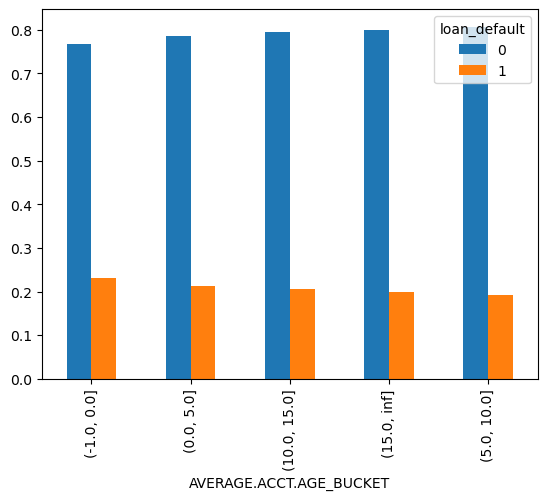

In [62]:
pd.crosstab(columns=train["loan_default"],
            index=train["AVERAGE.ACCT.AGE_BUCKET"],
            values=train["UniqueID"],
            aggfunc="count",normalize="index").sort_values(by=1,ascending=False).plot(kind="bar")

In [63]:
## customers who has taken loan recently have more chances for default

#### CREDIT.HISTORY.LENGTH

In [64]:
train["CREDIT.HISTORY.LENGTH"]

0          0yrs 0mon
1         1yrs 11mon
2          0yrs 0mon
3          1yrs 3mon
4          0yrs 0mon
             ...    
233149     3yrs 3mon
233150     0yrs 6mon
233151     0yrs 0mon
233152     0yrs 0mon
233153     0yrs 0mon
Name: CREDIT.HISTORY.LENGTH, Length: 233154, dtype: object

In [65]:
train["CREDIT.HISTORY.LENGTH"] = train["CREDIT.HISTORY.LENGTH"].apply(lambda x:int(x.split(" ")[0].split("yrs")[0])*12+int(x.split(" ")[1].split("mon")[0]))

In [66]:
train["CREDIT.HISTORY.LENGTH"]

0          0
1         23
2          0
3         15
4          0
          ..
233149    39
233150     6
233151     0
233152     0
233153     0
Name: CREDIT.HISTORY.LENGTH, Length: 233154, dtype: int64

In [67]:
train["CREDIT.HISTORY.LENGTH"].describe()

count    233154.000000
mean         16.252404
std          28.581255
min           0.000000
25%           0.000000
50%           0.000000
75%          24.000000
max         468.000000
Name: CREDIT.HISTORY.LENGTH, dtype: float64

In [68]:
# Create buckets of credit history and compare the default rate
train["CREDIT.HISTORY.LENGTH_BUCKET"] = pd.cut(train["CREDIT.HISTORY.LENGTH"],bins=[-1,0,10,20,30,np.PINF])

In [69]:
train["CREDIT.HISTORY.LENGTH_BUCKET"].value_counts()

(-1.0, 0.0]     119127
(30.0, inf]      42700
(0.0, 10.0]      26048
(10.0, 20.0]     23247
(20.0, 30.0]     22032
Name: CREDIT.HISTORY.LENGTH_BUCKET, dtype: int64

In [70]:
pd.crosstab(columns=train["loan_default"],
            index=train["CREDIT.HISTORY.LENGTH_BUCKET"],
            values=train["UniqueID"],
            aggfunc="count",margins=True,margins_name="total")

loan_default,0,1,total
CREDIT.HISTORY.LENGTH_BUCKET,,,
"(-1.0, 0.0]",91555,27572,119127
"(0.0, 10.0]",20536,5512,26048
"(10.0, 20.0]",18589,4658,23247
"(20.0, 30.0]",17103,4929,22032
"(30.0, inf]",34760,7940,42700
total,182543,50611,233154


In [71]:
pd.crosstab(columns=train["loan_default"],
            index=train["CREDIT.HISTORY.LENGTH_BUCKET"],
            values=train["UniqueID"],
            aggfunc="count",normalize="index").sort_values(by=1,ascending=False)

loan_default,0,1
CREDIT.HISTORY.LENGTH_BUCKET,,
"(-1.0, 0.0]",0.768550,0.231450
"(20.0, 30.0]",0.776280,0.223720
"(0.0, 10.0]",0.788391,0.211609
"(10.0, 20.0]",0.799630,0.200370
"(30.0, inf]",0.814052,0.185948


<AxesSubplot:xlabel='CREDIT.HISTORY.LENGTH_BUCKET'>

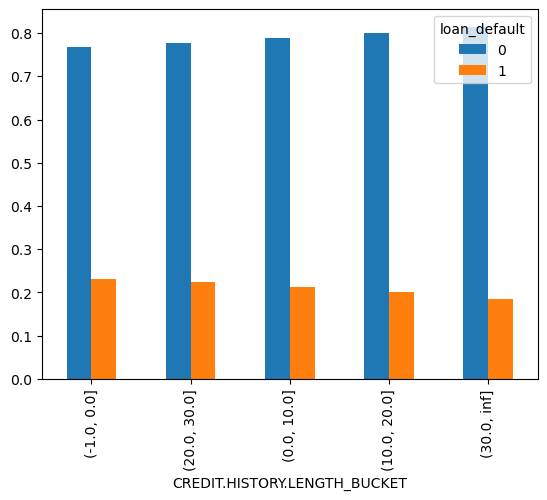

In [72]:
pd.crosstab(columns=train["loan_default"],
            index=train["CREDIT.HISTORY.LENGTH_BUCKET"],
            values=train["UniqueID"],
            aggfunc="count",normalize="index").sort_values(by=1,ascending=False).plot(kind="bar")

#### dividing the dataset into 3 parts devlopment,validation and out-of time

In [73]:
train["sample_type"] = train["Disbursal_Month"].apply(lambda x:"dev_val" 
                                                      if x<pd.to_datetime("2018-10-01") else "oot")

In [74]:
train["sample_type"].value_counts()

dev_val    134790
oot         98364
Name: sample_type, dtype: int64

In [75]:
from sklearn.model_selection import train_test_split
dev, val = train_test_split(train[train["sample_type"]=="dev_val"].reset_index(), test_size=0.1)

In [76]:
dev["sample_type"] ="dev"
val["sample_type"]= "val"
oot = train[train["sample_type"]=="oot"]
train = pd.concat([dev,val,oot])

In [77]:
train.shape

(233154, 48)

In [78]:
train["sample_type"].value_counts(normalize=True)*100

dev    52.030418
oot    42.188425
val     5.781158
Name: sample_type, dtype: float64

### CATEGORICAL VARIABLE DATA PROCESSING

In [79]:
for col in ["age_group",
"AVERAGE.ACCT.AGE_BUCKET",
"CREDIT.HISTORY.LENGTH_BUCKET"]:
    train[col] = train[col].astype(str)
        # print(col)

In [80]:
cat_cols2 = []
for col in train.columns:
    if train[col].dtypes == "object" and col not in ["Date.of.Birth","sample_type"]:
        print(col)
        cat_cols2.append(col)

Employment.Type
PERFORM_CNS.SCORE.DESCRIPTION
age_group
AVERAGE.ACCT.AGE_BUCKET
CREDIT.HISTORY.LENGTH_BUCKET


#### combining category

In [81]:
train["Employment.Type"].unique()

array(['Salaried', 'Self employed', nan], dtype=object)

In [82]:
train["Employment.Type"] = train[["Employment.Type"]].fillna("not_available")

In [83]:
train["PERFORM_CNS.SCORE.DESCRIPTION"].unique()

array(['No Bureau History Available', 'F-Low Risk', 'A-Very Low Risk',
       'B-Very Low Risk', 'H-Medium Risk',
       'Not Scored: No Updates available in last 36 months',
       'C-Very Low Risk', 'M-Very High Risk', 'G-Low Risk',
       'Not Scored: Not Enough Info available on the customer',
       'Not Scored: Sufficient History Not Available',
       'Not Scored: Only a Guarantor', 'J-High Risk', 'L-Very High Risk',
       'I-Medium Risk', 'K-High Risk', 'D-Very Low Risk',
       'Not Scored: No Activity seen on the customer (Inactive)',
       'E-Low Risk', 'Not Scored: More than 50 active Accounts found'],
      dtype=object)

In [84]:
train["PERFORM_CNS.SCORE.DESCRIPTION_2"] = train["PERFORM_CNS.SCORE.DESCRIPTION"].apply(
                                                                        lambda x:"LOW_RISK"
                                                                        if "low" in x.lower() else
                                                                        "MID_RISK" if "med" in x.lower()
else "HIGH_RISK" if "high" in x.lower() else "NTC" if x=="No Bureau History Available" else "others" )

In [85]:
train["PERFORM_CNS.SCORE.DESCRIPTION_2"].value_counts()

NTC          116950
LOW_RISK      69022
HIGH_RISK     21935
others        12835
MID_RISK      12412
Name: PERFORM_CNS.SCORE.DESCRIPTION_2, dtype: int64

In [86]:
pd.crosstab(columns=train["loan_default"],
            index=train["PERFORM_CNS.SCORE.DESCRIPTION_2"],
            values=train["UniqueID"],
            aggfunc="count",normalize="index").sort_values(by=1,ascending=False)

loan_default,0,1
PERFORM_CNS.SCORE.DESCRIPTION_2,,
HIGH_RISK,0.715569,0.284431
MID_RISK,0.744360,0.255640
NTC,0.768687,0.231313
others,0.784729,0.215271
LOW_RISK,0.835067,0.164933


In [87]:
state=pd.crosstab(columns=dev["loan_default"],index=dev["State_ID"],values=dev["UniqueID"],aggfunc="count",margins=True,normalize="columns",
            margins_name="total").sort_values(by=["total"],ascending=False)[["total"]]

In [88]:
pd.crosstab(columns=dev["loan_default"],index=dev["State_ID"],values=dev["UniqueID"],aggfunc="count",margins=True,normalize="columns",
            margins_name="total").sort_values(by=["total"],ascending=False)

loan_default,0,1,total
State_ID,,,
4,0.194257,0.180367,0.191417
6,0.143276,0.136505,0.141892
3,0.126044,0.104092,0.121555
13,0.072462,0.120137,0.082210
9,0.075177,0.073574,0.074849
8,0.065125,0.066962,0.065501
14,0.040920,0.058214,0.044456
5,0.042381,0.037291,0.041340
1,0.042992,0.032131,0.040771


In [89]:
state_group = {}
count_add = [] 
states1=[]
for i in range(len(state)):
    if state.reset_index().loc[i,"total"] >= 0.05:
        states=[]
        state_code = state.reset_index().loc[i,"State_ID"]
        states.append(state_code)
        # print(states.append(state_code))
        state_group["group_"+str(i)] = states
    else:
        count = state.reset_index().loc[i,"total"]
        count_add.append(count)
        print(count_add)
        state_code = state.reset_index().loc[i,"State_ID"]
        states1.append(state_code)
        if sum(count_add)>=0.05:
            print(sum(count_add),states1)
            state_group["group_"+str(i)] = states1
            count_add = [] 
            states1=[]

[0.04445598503021161]
[0.04445598503021161, 0.041340026873078285]
0.08579601190328989 [14, 5]
[0.04077124086026824]
[0.04077124086026824, 0.03215701791263777]
0.07292825877290601 [1, 7]
[0.030689714865098795]
[0.030689714865098795, 0.025710776434123863]
0.05640049129922266 [11, 18]
[0.01978386131513218]
[0.01978386131513218, 0.01911615599574647]
[0.01978386131513218, 0.01911615599574647, 0.017681826050399387]
0.05658184336127804 [15, 12, 2]
[0.017063580384301506]
[0.017063580384301506, 0.016016684389709095]
[0.017063580384301506, 0.016016684389709095, 0.011342747154009116]
[0.017063580384301506, 0.016016684389709095, 0.011342747154009116, 0.00497069515542696]
[0.017063580384301506, 0.016016684389709095, 0.011342747154009116, 0.00497069515542696, 0.0008078410037012307]
0.05020154808714791 [10, 17, 16, 19, 20]
[0.00040392050185061537]
[0.00040392050185061537, 0.00026378481753509575]


In [90]:
group_dict={}
for group,value in state_group.items():
    for v in value:
        group_dict[v] = group

In [91]:
len(set(group_dict.values()))

11

In [92]:
train["State_ID2"] = train["State_ID"].apply(lambda x:group_dict[x] if x in group_dict.keys() else "group_others")

In [93]:
train["State_ID2"].value_counts()

group_0         44870
group_2         34078
group_1         33505
group_7         19591
group_3         17884
group_4         16022
group_9         15722
group_5         14197
group_14        13419
group_11        12133
group_19        11501
group_others      232
Name: State_ID2, dtype: int64

In [94]:
train["age_group"].unique()

array(['(40.0, 45.0]', '(21.0, 30.0]', '(35.0, 40.0]', '(-inf, 0.0]',
       '(30.0, 35.0]', '(0.0, 21.0]'], dtype=object)

In [95]:
train["AVERAGE.ACCT.AGE_BUCKET"].unique()

array(['(-1.0, 0.0]', '(0.0, 5.0]', '(15.0, inf]', '(10.0, 15.0]',
       '(5.0, 10.0]'], dtype=object)

In [96]:
train["CREDIT.HISTORY.LENGTH_BUCKET"].unique()

array(['(-1.0, 0.0]', '(0.0, 10.0]', '(20.0, 30.0]', '(30.0, inf]',
       '(10.0, 20.0]'], dtype=object)

### WE WILL LOOK INTO NUMERICAL FEATURES NOW

In [97]:
num_cols

['disbursed_amount',
 'asset_cost',
 'ltv',
 'MobileNo_Avl_Flag',
 'Aadhar_flag',
 'PAN_flag',
 'VoterID_flag',
 'Driving_flag',
 'Passport_flag',
 'PERFORM_CNS.SCORE',
 'PRI.NO.OF.ACCTS',
 'PRI.ACTIVE.ACCTS',
 'PRI.OVERDUE.ACCTS',
 'PRI.CURRENT.BALANCE',
 'PRI.SANCTIONED.AMOUNT',
 'PRI.DISBURSED.AMOUNT',
 'SEC.NO.OF.ACCTS',
 'SEC.ACTIVE.ACCTS',
 'SEC.OVERDUE.ACCTS',
 'SEC.CURRENT.BALANCE',
 'SEC.SANCTIONED.AMOUNT',
 'SEC.DISBURSED.AMOUNT',
 'PRIMARY.INSTAL.AMT',
 'SEC.INSTAL.AMT',
 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
 'NO.OF_INQUIRIES']

#### disbursed_amount

In [98]:
train["disbursed_amount"].describe()

count    233154.000000
mean      54356.993528
std       12971.314171
min       13320.000000
25%       47145.000000
50%       53803.000000
75%       60413.000000
max      990572.000000
Name: disbursed_amount, dtype: float64

In [99]:
train["disbursed_bucket"] = pd.cut(train["disbursed_amount"],bins=[0,50000,60000,100000,np.PINF])

In [100]:
train["disbursed_bucket"].value_counts()

(50000.0, 60000.0]     91576
(0.0, 50000.0]         80819
(60000.0, 100000.0]    59924
(100000.0, inf]          835
Name: disbursed_bucket, dtype: int64

In [101]:
pd.crosstab(columns=train["loan_default"],
            index=train["disbursed_bucket"],
            values=train["UniqueID"],
            aggfunc="count",normalize="index").sort_values(by=1,ascending=False)

loan_default,0,1
disbursed_bucket,,
"(60000.0, 100000.0]",0.742991,0.257009
"(50000.0, 60000.0]",0.766041,0.233959
"(100000.0, inf]",0.790419,0.209581
"(0.0, 50000.0]",0.831599,0.168401


### ltv

In [102]:
train["ltv"].describe()

count    233154.000000
mean         74.746530
std          11.456636
min          10.030000
25%          68.880000
50%          76.800000
75%          83.670000
max          95.000000
Name: ltv, dtype: float64

In [103]:
train["ltv_bucket"] = pd.cut(train["ltv"],bins=[0,50,60,70,80,90,100])

In [104]:
pd.crosstab(columns=train["loan_default"],
            index=train["ltv_bucket"],
            values=train["UniqueID"],
            aggfunc="count",normalize="index").sort_values(by=1,ascending=False)

loan_default,0,1
ltv_bucket,,
"(80, 90]",0.741176,0.258824
"(70, 80]",0.780069,0.219931
"(90, 100]",0.793884,0.206116
"(60, 70]",0.822884,0.177116
"(50, 60]",0.855948,0.144052
"(0, 50]",0.870537,0.129463


### flag variable
MobileNo_Avl_Flag',
 'Aadhar_flag',
 'PAN_flag',
 'VoterID_flag',
 'Driving_flag',
 'Passport_flag',

In [105]:
pd.crosstab(columns=train["loan_default"],
            index=train["MobileNo_Avl_Flag"],
            values=train["UniqueID"],
            aggfunc="count",normalize="index").sort_values(by=1,ascending=False)

loan_default,0,1
MobileNo_Avl_Flag,,
1,0.782929,0.217071


In [106]:
pd.crosstab(columns=train["loan_default"],
            index=train["Aadhar_flag"],
            values=train["UniqueID"],
            aggfunc="count",normalize="index").sort_values(by=1,ascending=False)

loan_default,0,1
Aadhar_flag,,
0,0.743594,0.256406
1,0.790403,0.209597


In [107]:
pd.crosstab(columns=train["loan_default"],
            index=train["PAN_flag"],
            values=train["UniqueID"],
            aggfunc="count",normalize="index").sort_values(by=1,ascending=False)

loan_default,0,1
PAN_flag,,
1,0.779978,0.220022
0,0.783170,0.216830


In [108]:
pd.crosstab(columns=train["loan_default"],
            index=train["VoterID_flag"],
            values=train["UniqueID"],
            aggfunc="count",normalize="index").sort_values(by=1,ascending=False)

loan_default,0,1
VoterID_flag,,
1,0.739125,0.260875
0,0.790354,0.209646


In [109]:
pd.crosstab(columns=train["loan_default"],
            index=train["Driving_flag"],
            values=train["UniqueID"],
            aggfunc="count",normalize="index").sort_values(by=1,ascending=False)

loan_default,0,1
Driving_flag,,
0,0.782559,0.217441
1,0.798487,0.201513


In [110]:
pd.crosstab(columns=train["loan_default"],
            index=train["Passport_flag"],
            values=train["UniqueID"],
            aggfunc="count",normalize="index").sort_values(by=1,ascending=False)

loan_default,0,1
Passport_flag,,
0,0.782784,0.217216
1,0.850806,0.149194


### Information Value and Weight of Evidence

In [111]:
dev = train[train["sample_type"]=="dev"]
val =train[train["sample_type"]=="val"]
oot =train[train["sample_type"]=="oot"]

In [112]:
train.columns

Index(['index', 'UniqueID', 'disbursed_amount', 'asset_cost', 'ltv',
       'branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID',
       'Date.of.Birth', 'Employment.Type', 'DisbursalDate', 'State_ID',
       'Employee_code_ID', 'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag',
       'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default', 'Disbursal_Month', 'age_at_the_time_of_loan_taken',
       'age_group', 'AVERAGE.ACCT.A

In [113]:
# Calculate information value
import pandas as pd
import numpy as np
from scipy import stats

def calc_iv(df, feature, target, pr=0):

    lst = []

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature, val, df[df[feature] == val].count()[feature], df[(df[feature] == val) & (df[target] == 1)].count()[feature]])

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Bad'])
    data = data[data['Bad'] > 0]

    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])
    data['IV'] = (data['WoE'] * (data['Distribution Good'] - data['Distribution Bad']))

    data = data.sort_values(by=['Variable', 'Value'], ascending=True)

    if pr == 1:
        print(data)

    return data,data["IV"].sum()


In [114]:
cat_cols2 = ['Employment.Type',
 'PERFORM_CNS.SCORE.DESCRIPTION_2',
 'age_group',
 'AVERAGE.ACCT.AGE_BUCKET',
 'CREDIT.HISTORY.LENGTH_BUCKET','State_ID2']

In [115]:
cat_iv_df = pd.DataFrame()
for col in cat_cols2:
    temp,iv=calc_iv(train[train["sample_type"]=="dev"], col, "loan_default", pr=0)
    cat_iv_df = pd.concat([cat_iv_df,temp])


In [116]:
cat_iv_df

,Variable,Value,All,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,Employment.Type,Salaried,51562,9880,0.425040,0.191614,0.431911,0.398307,0.080997,0.002722
1,Employment.Type,Self employed,66058,14190,0.544534,0.214811,0.537459,0.572062,-0.062395,0.002159
2,Employment.Type,not_available,3691,735,0.030426,0.199133,0.030630,0.029631,0.033162,0.000033
4,PERFORM_CNS.SCORE.DESCRIPTION_2,HIGH_RISK,11717,3082,0.096586,0.263037,0.089476,0.124249,-0.328315,0.011416
1,PERFORM_CNS.SCORE.DESCRIPTION_2,LOW_RISK,36053,5319,0.297195,0.147533,0.318467,0.214433,0.395524,0.041148
2,PERFORM_CNS.SCORE.DESCRIPTION_2,MID_RISK,6545,1491,0.053952,0.227807,0.052370,0.060109,-0.137827,0.001067
0,PERFORM_CNS.SCORE.DESCRIPTION_2,NTC,60428,13612,0.498125,0.225260,0.485110,0.548760,-0.123287,0.007847
3,PERFORM_CNS.SCORE.DESCRIPTION_2,others,6568,1301,0.054142,0.198082,0.054577,0.052449,0.039768,0.000085
3,age_group,"(-inf, 0.0]",18068,3301,0.148940,0.182699,0.153016,0.133078,0.139610,0.002784
5,age_group,"(0.0, 21.0]",7260,1767,0.059846,0.243388,0.056919,0.071236,-0.224369,0.003212


In [117]:
cat_iv_df_total = cat_iv_df.groupby(["Variable"]).agg({"IV":"sum"})

In [118]:
cat_iv_df_total

,IV
Variable,
AVERAGE.ACCT.AGE_BUCKET,0.018497
CREDIT.HISTORY.LENGTH_BUCKET,0.022127
Employment.Type,0.004914
PERFORM_CNS.SCORE.DESCRIPTION_2,0.061563
State_ID2,0.035305
age_group,0.009570


In [119]:
cat_encoder = {}
for col in cat_cols2:
    cat_encoder[col] = dict(zip(cat_iv_df[cat_iv_df["Variable"]==col]["Value"],cat_iv_df[cat_iv_df["Variable"]==col]["WoE"]))

In [120]:
cat_encoder

{'Employment.Type': {'Salaried': 0.08099693235414898,
  'Self employed': -0.06239539831018684,
  'not_available': 0.03316184603038235},
 'PERFORM_CNS.SCORE.DESCRIPTION_2': {'HIGH_RISK': -0.3283149621241555,
  'LOW_RISK': 0.3955242810480866,
  'MID_RISK': -0.1378269636414723,
  'NTC': -0.1232866686258189,
  'others': 0.03976780414601067},
 'age_group': {'(-inf, 0.0]': 0.1396095717957076,
  '(0.0, 21.0]': -0.22436857580194938,
  '(21.0, 30.0]': -0.07326938146265745,
  '(30.0, 35.0]': 0.0429245897889924,
  '(35.0, 40.0]': 0.059525703459993536,
  '(40.0, 45.0]': 0.08253297886209138},
 'AVERAGE.ACCT.AGE_BUCKET': {'(-1.0, 0.0]': -0.12286616725289769,
  '(0.0, 5.0]': 0.027872765583195142,
  '(10.0, 15.0]': 0.0952540765320366,
  '(15.0, inf]': 0.15580481775687807,
  '(5.0, 10.0]': 0.21318973129881147},
 'CREDIT.HISTORY.LENGTH_BUCKET': {'(-1.0, 0.0]': -0.12221502988649356,
  '(0.0, 10.0]': 0.04874044798806638,
  '(10.0, 20.0]': 0.15674575602959864,
  '(20.0, 30.0]': -0.009855303068497499,
  '(3

In [121]:
train.columns

Index(['index', 'UniqueID', 'disbursed_amount', 'asset_cost', 'ltv',
       'branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID',
       'Date.of.Birth', 'Employment.Type', 'DisbursalDate', 'State_ID',
       'Employee_code_ID', 'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag',
       'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default', 'Disbursal_Month', 'age_at_the_time_of_loan_taken',
       'age_group', 'AVERAGE.ACCT.A

In [122]:
!pip install optbinning

In [123]:
import optbinning as opt

(CVXPY) Apr 08 02:22:53 AM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.5.2237). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Apr 08 02:22:53 AM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.5.2237). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


In [124]:
train["UniqueID"]

80529     539442
80195     543253
101442    469374
93722     483319
47717     421442
           ...  
233148    613494
233149    626432
233150    606141
233151    613658
233153    630213
Name: UniqueID, Length: 233154, dtype: int64

In [125]:
train=train.set_index("UniqueID")

In [126]:
train

,index,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,Disbursal_Month,age_at_the_time_of_loan_taken,age_group,AVERAGE.ACCT.AGE_BUCKET,CREDIT.HISTORY.LENGTH_BUCKET,sample_type,PERFORM_CNS.SCORE.DESCRIPTION_2,State_ID2,disbursed_bucket,ltv_bucket
UniqueID,,,,,,,,,,,,,,,,,,,,,
539442,136910.0,47345,67395,72.71,67,16640,45,1471,01-01-76,Salaried,...,2018-09-01,42,"(40.0, 45.0]","(-1.0, 0.0]","(-1.0, 0.0]",dev,NTC,group_1,"(0.0, 50000.0]","(70, 80]"
543253,136353.0,54519,73362,79.06,160,24080,51,96,04-01-94,Salaried,...,2018-09-01,24,"(21.0, 30.0]","(0.0, 5.0]","(0.0, 10.0]",dev,LOW_RISK,group_19,"(50000.0, 60000.0]","(70, 80]"
469374,170711.0,47449,58000,84.48,147,17742,45,2782,01-01-81,Salaried,...,2018-08-01,37,"(35.0, 40.0]","(15.0, inf]","(20.0, 30.0]",dev,LOW_RISK,group_14,"(0.0, 50000.0]","(80, 90]"
483319,158040.0,51078,62471,84.84,105,15798,86,1214,20-10-69,Salaried,...,2018-08-01,-51,"(-inf, 0.0]","(15.0, inf]","(20.0, 30.0]",dev,LOW_RISK,group_1,"(50000.0, 60000.0]","(80, 90]"
421442,82470.0,49303,64238,79.39,130,15272,49,988,19-07-86,Self employed,...,2018-08-01,32,"(30.0, 35.0]","(10.0, 15.0]","(20.0, 30.0]",dev,LOW_RISK,group_1,"(0.0, 50000.0]","(70, 80]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613494,NaN,42894,60334,72.93,34,20700,48,1051,08-07-93,Salaried,...,2018-10-01,25,"(21.0, 30.0]","(-1.0, 0.0]","(-1.0, 0.0]",oot,NTC,group_1,"(0.0, 50000.0]","(70, 80]"
626432,NaN,63213,105405,60.72,34,20700,48,1050,01-08-88,Salaried,...,2018-10-01,30,"(21.0, 30.0]","(15.0, inf]","(30.0, inf]",oot,LOW_RISK,group_1,"(60000.0, 100000.0]","(60, 70]"
606141,NaN,73651,100600,74.95,34,23775,51,990,05-12-88,Self employed,...,2018-10-01,30,"(21.0, 30.0]","(5.0, 10.0]","(0.0, 10.0]",oot,LOW_RISK,group_1,"(60000.0, 100000.0]","(70, 80]"


  0%|          | 0/27 [00:00<?, ?it/s]

disbursed_amount


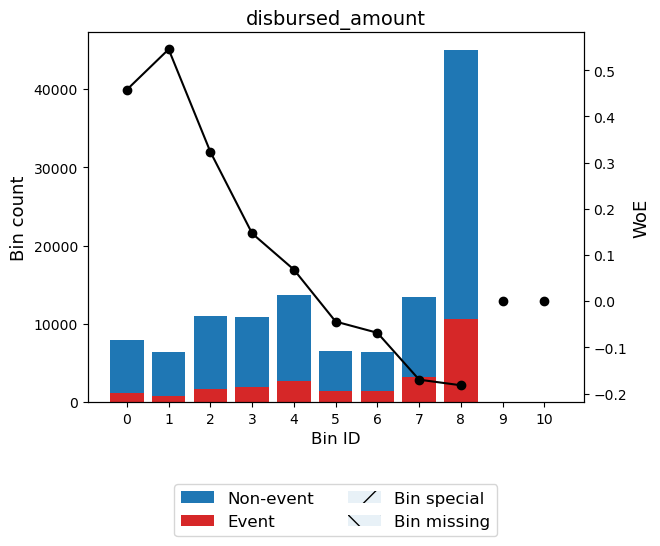

  4%|▎         | 1/27 [00:00<00:12,  2.15it/s]

#################### 1 #################
asset_cost


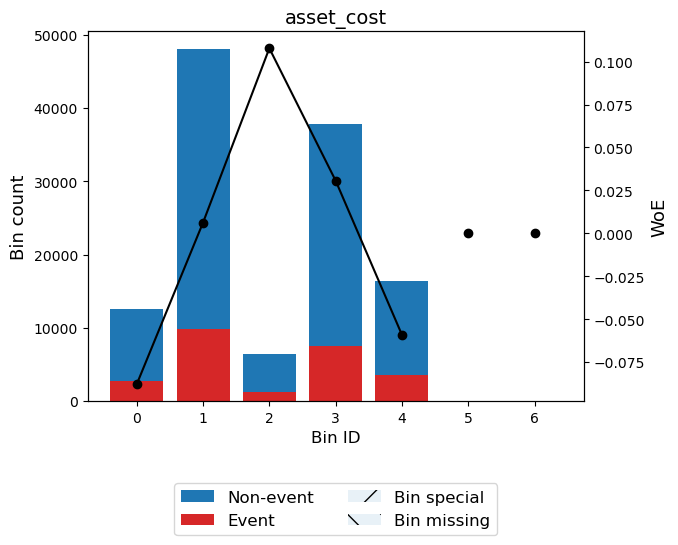

  7%|▋         | 2/27 [00:00<00:10,  2.30it/s]

#################### 2 #################
ltv


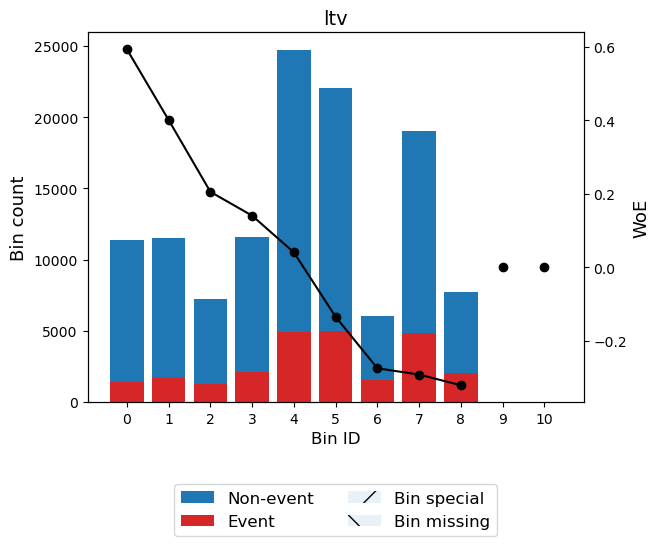

 11%|█         | 3/27 [00:01<00:08,  2.84it/s]

#################### 3 #################
MobileNo_Avl_Flag


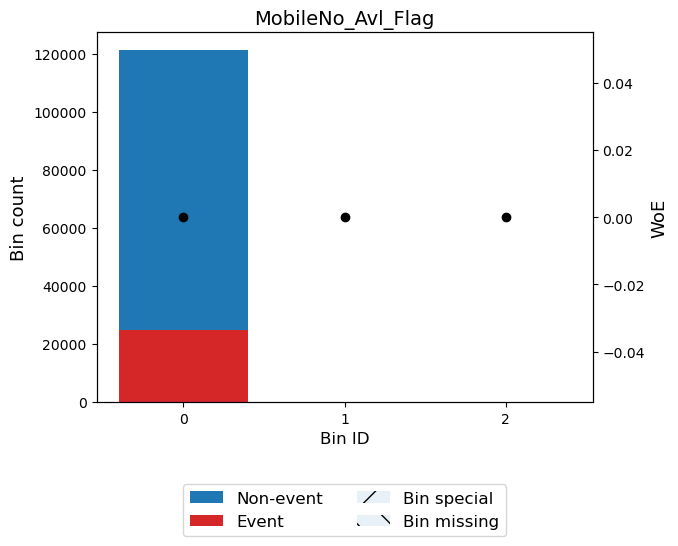

 15%|█▍        | 4/27 [00:01<00:06,  3.79it/s]

#################### 4 #################
Aadhar_flag


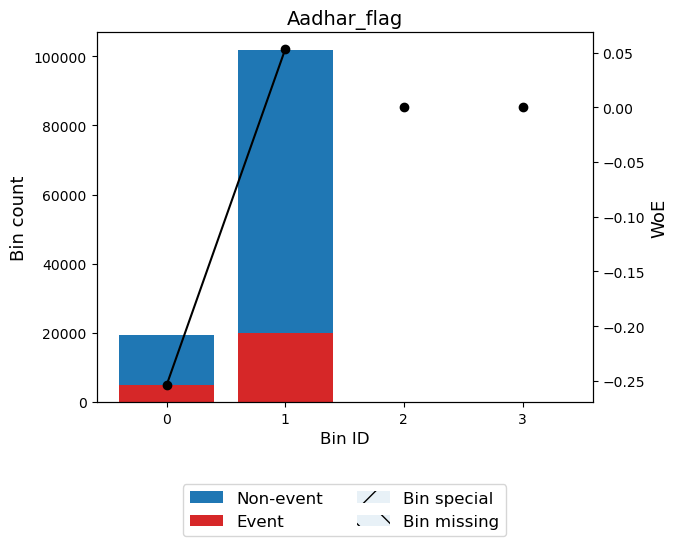

 19%|█▊        | 5/27 [00:01<00:04,  4.51it/s]

#################### 5 #################
PAN_flag


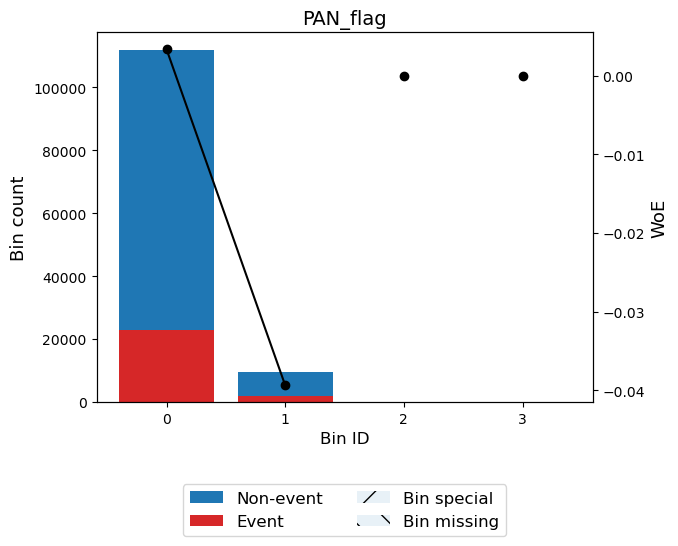

 22%|██▏       | 6/27 [00:01<00:04,  5.06it/s]

#################### 6 #################
VoterID_flag


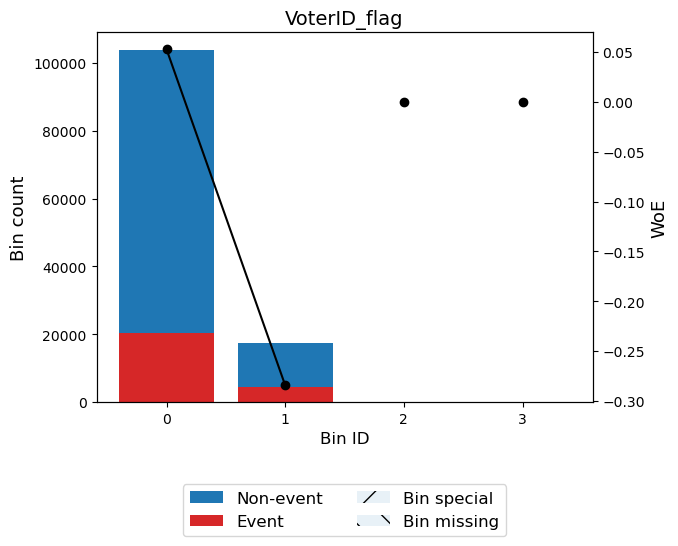

 26%|██▌       | 7/27 [00:01<00:03,  5.50it/s]

#################### 7 #################
Driving_flag


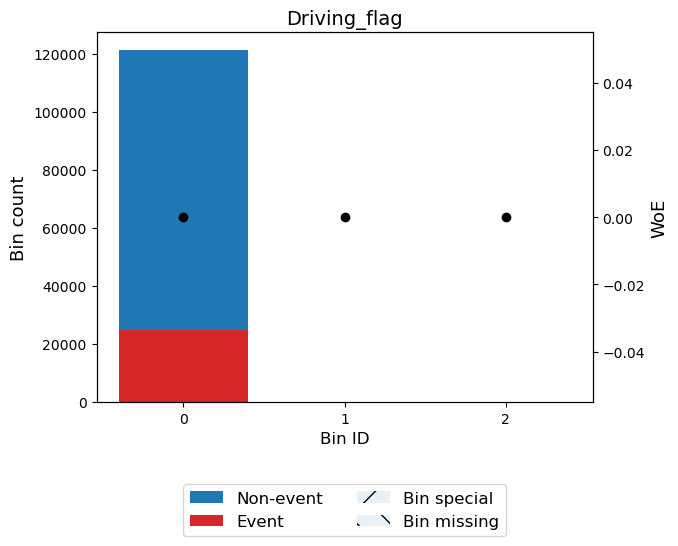

 30%|██▉       | 8/27 [00:01<00:03,  5.43it/s]

#################### 8 #################
Passport_flag


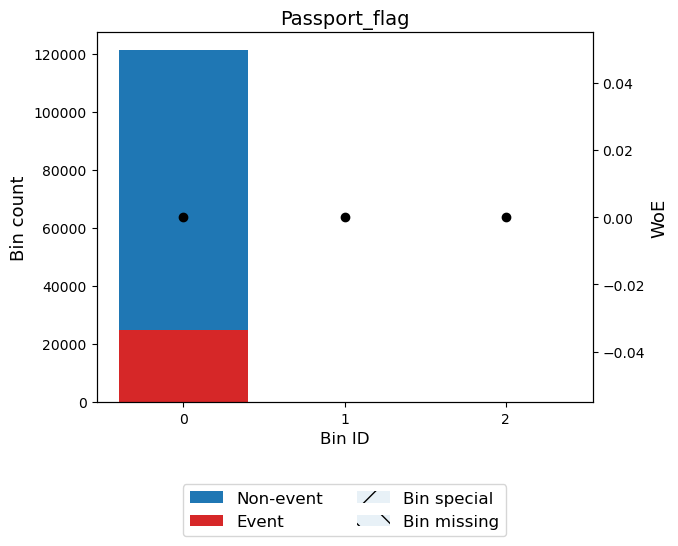

 33%|███▎      | 9/27 [00:02<00:03,  5.95it/s]

#################### 9 #################
PERFORM_CNS.SCORE


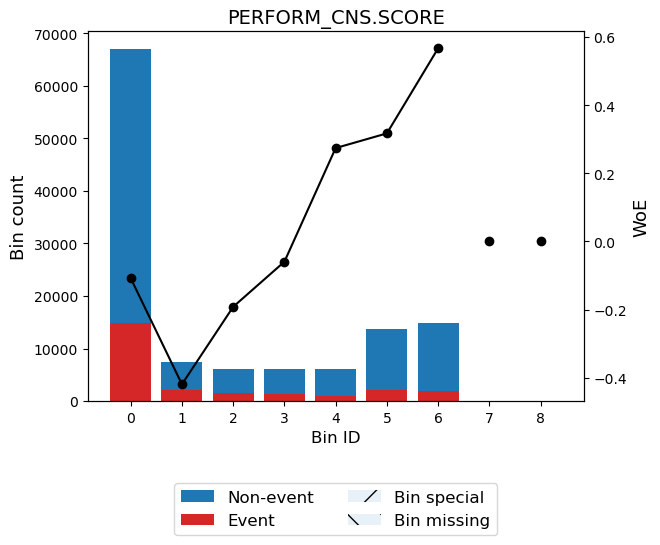

 37%|███▋      | 10/27 [00:02<00:03,  5.16it/s]

#################### 10 #################
PRI.NO.OF.ACCTS


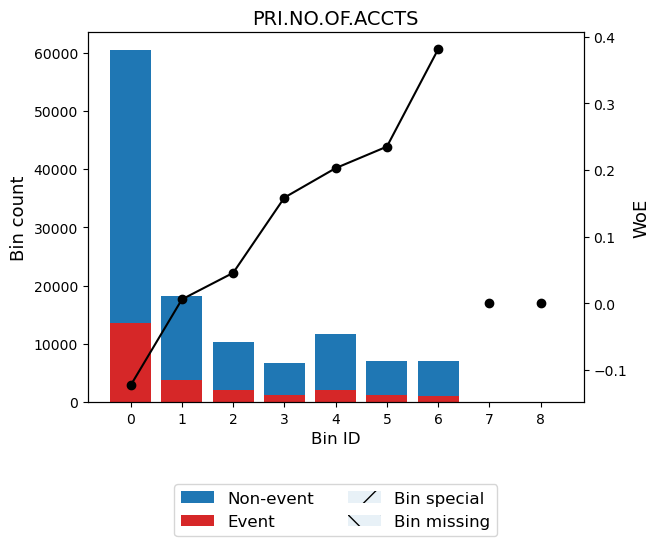

#################### 11 #################


 41%|████      | 11/27 [00:02<00:03,  5.14it/s]

PRI.ACTIVE.ACCTS


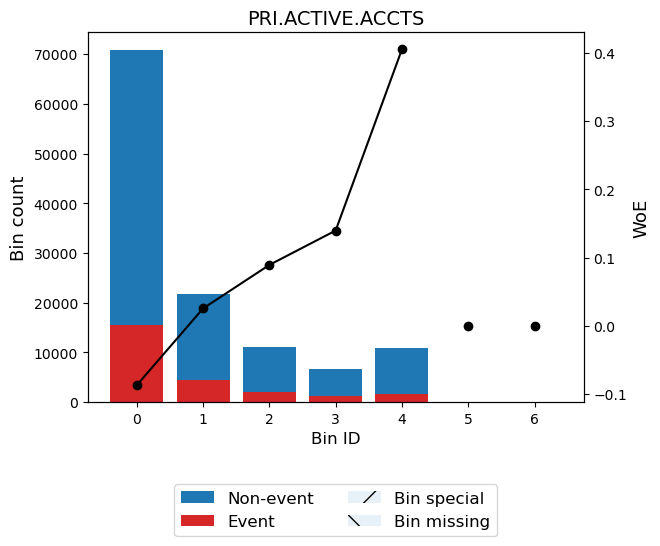

 44%|████▍     | 12/27 [00:02<00:02,  5.30it/s]

#################### 12 #################
PRI.OVERDUE.ACCTS


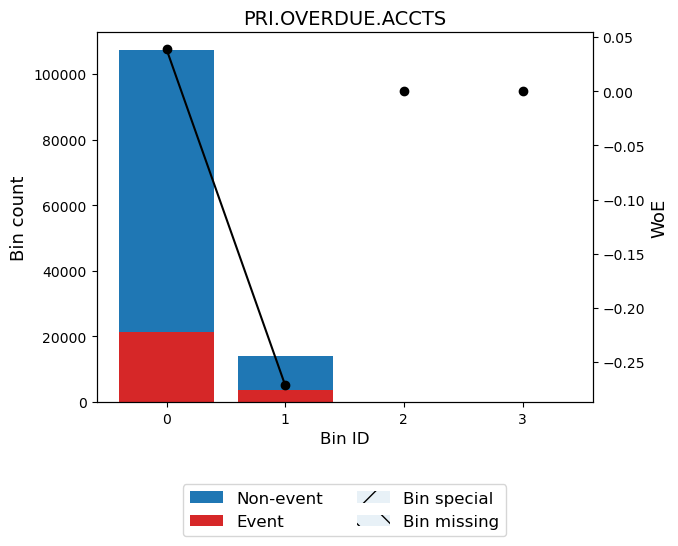

 48%|████▊     | 13/27 [00:02<00:02,  5.60it/s]

#################### 13 #################
PRI.CURRENT.BALANCE


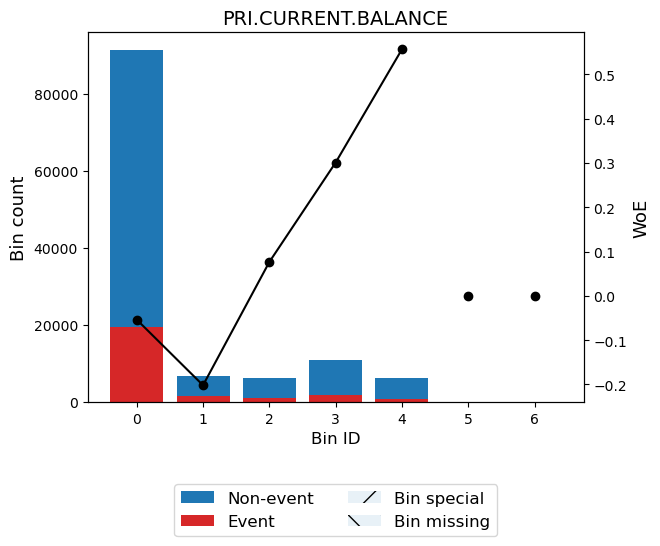

 52%|█████▏    | 14/27 [00:03<00:02,  5.22it/s]

#################### 14 #################
PRI.SANCTIONED.AMOUNT


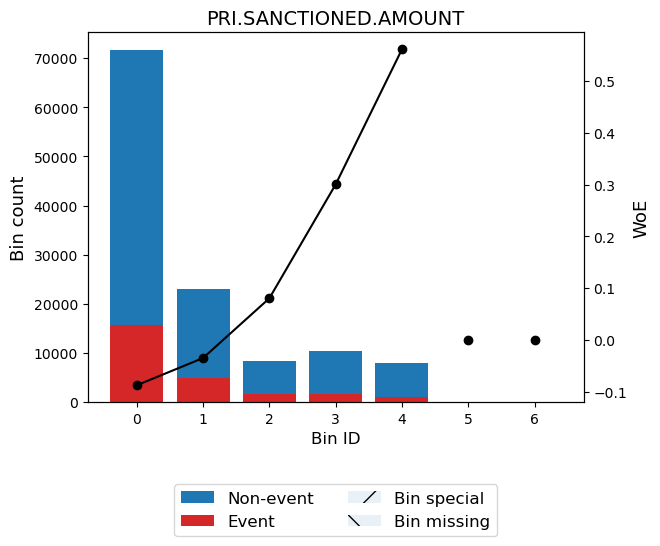

 56%|█████▌    | 15/27 [00:03<00:02,  4.98it/s]

#################### 15 #################
PRI.DISBURSED.AMOUNT


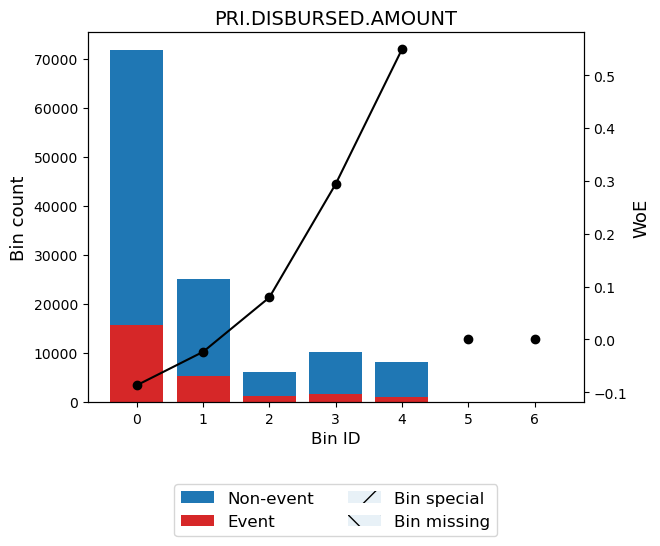

 59%|█████▉    | 16/27 [00:03<00:02,  4.72it/s]

#################### 16 #################
SEC.NO.OF.ACCTS


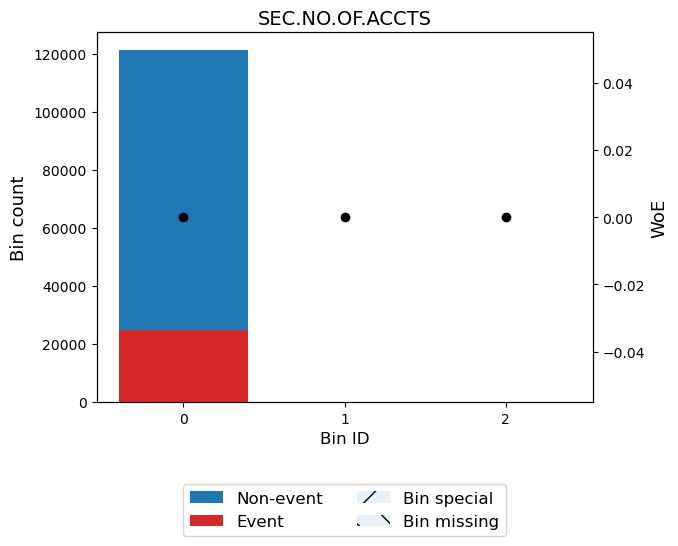

 63%|██████▎   | 17/27 [00:03<00:02,  4.71it/s]

#################### 17 #################
SEC.ACTIVE.ACCTS


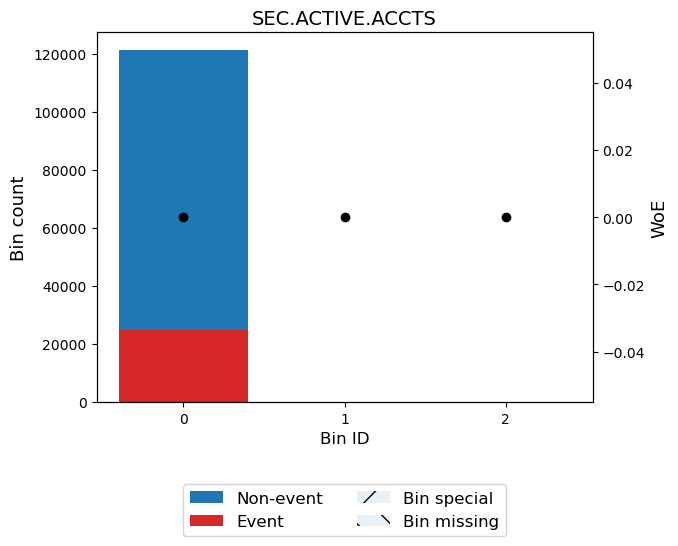

 67%|██████▋   | 18/27 [00:03<00:01,  5.24it/s]

#################### 18 #################
SEC.OVERDUE.ACCTS


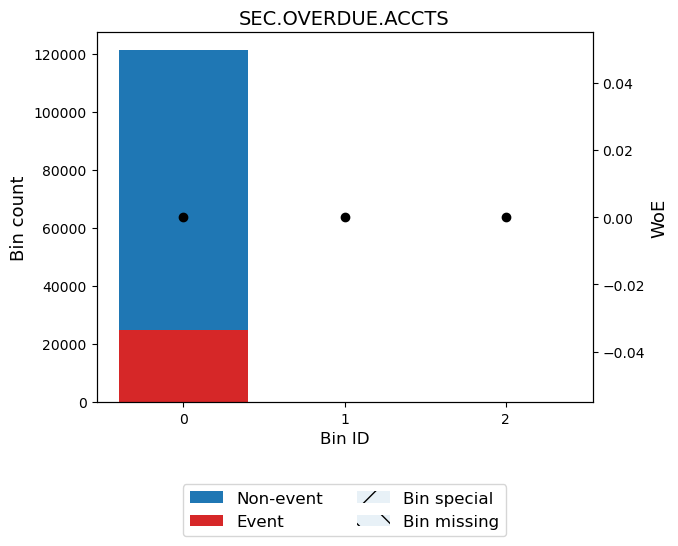

 70%|███████   | 19/27 [00:03<00:01,  5.61it/s]

#################### 19 #################
SEC.CURRENT.BALANCE


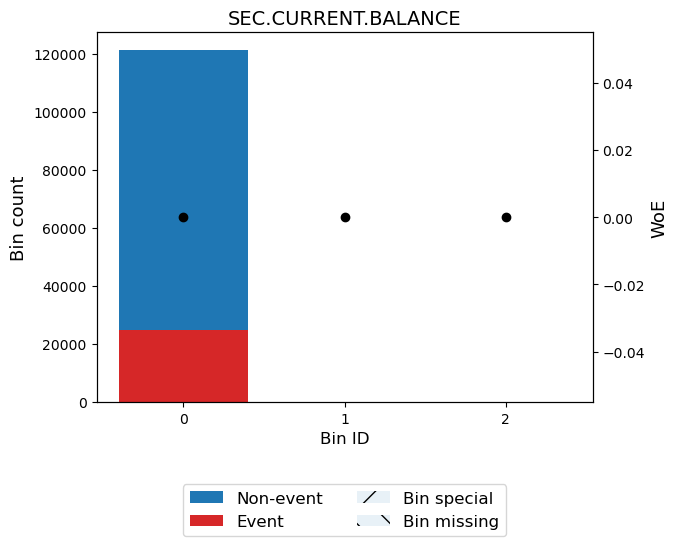

 74%|███████▍  | 20/27 [00:04<00:01,  5.94it/s]

#################### 20 #################
SEC.SANCTIONED.AMOUNT


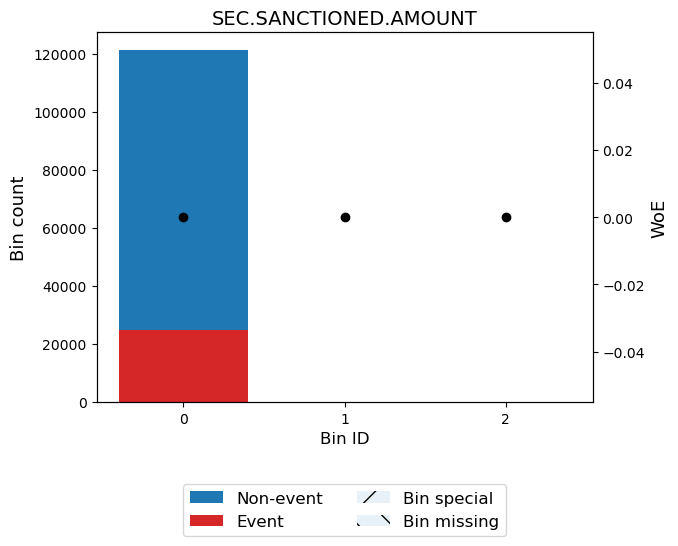

 78%|███████▊  | 21/27 [00:04<00:00,  6.24it/s]

#################### 21 #################
SEC.DISBURSED.AMOUNT


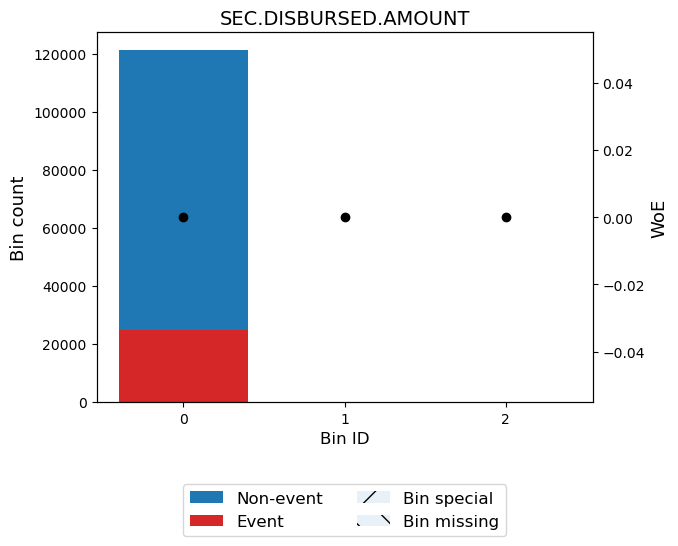

 81%|████████▏ | 22/27 [00:04<00:00,  6.42it/s]

#################### 22 #################
PRIMARY.INSTAL.AMT


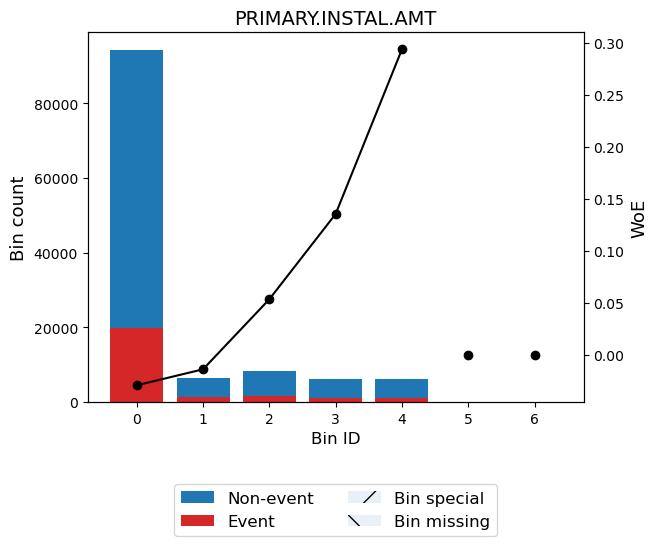

#################### 23 #################


 85%|████████▌ | 23/27 [00:04<00:00,  5.93it/s]

SEC.INSTAL.AMT


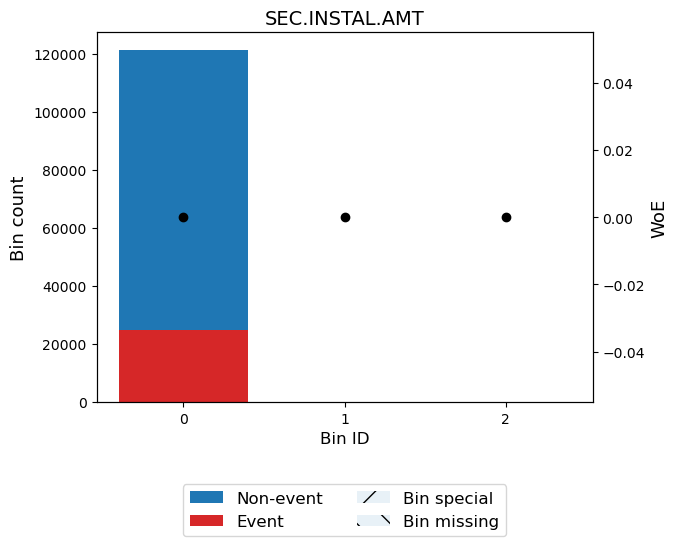

 89%|████████▉ | 24/27 [00:04<00:00,  6.21it/s]

#################### 24 #################
NEW.ACCTS.IN.LAST.SIX.MONTHS


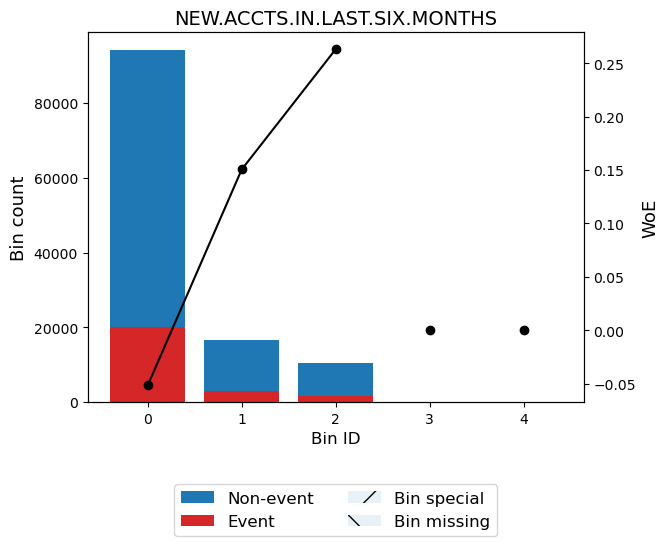

 93%|█████████▎| 25/27 [00:04<00:00,  6.14it/s]

#################### 25 #################
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS


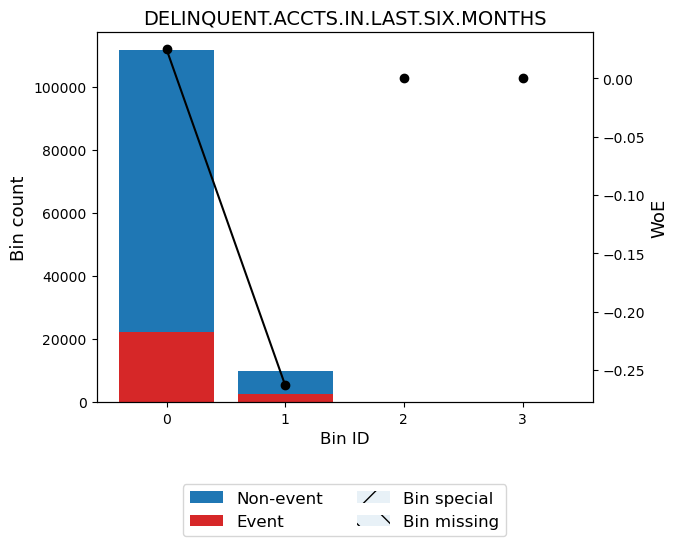

 96%|█████████▋| 26/27 [00:05<00:00,  6.14it/s]

#################### 26 #################
NO.OF_INQUIRIES


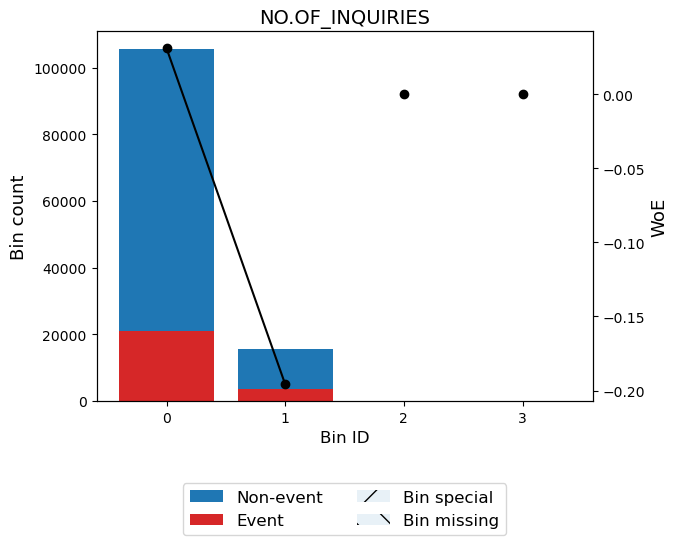

100%|██████████| 27/27 [00:05<00:00,  5.07it/s]

#################### 27 #################


In [127]:
#### weighted IV
from tqdm import tqdm
from optbinning import OptimalBinning

ivs = dict(np.complex64(x) for x in range(0))

details_binning_table = pd.DataFrame(columns = ['Variable_Name','Bin', 'Count', 'Count (%)', 'Non-event', 'Event', 'Event rate','distribution_good','distribution_bad' ,'WoE','IV'])

# sel_features = final_features
features = num_cols

target = 'loan_default'

j=0
woe_table = pd.DataFrame(index=train.index)
for variable in tqdm(features):
    print(variable)
    x = dev[variable].values
    y = dev[target]
    
    optb = OptimalBinning(name=variable, dtype="numerical", solver="cp")
    optb.fit(x, y)

    binning_table = optb.binning_table
    tab = binning_table.build()
    optb.binning_table.plot(metric="woe")
    tab["distribution_good"] = tab["Non-event"]/tab.loc["Totals","Non-event"]
    tab["distribution_bad"] = tab["Event"]/tab.loc["Totals","Event"]
    tab['Variable_Name'] = variable
    # details_binning_table = pd.concat([details_binning_table,tab[['Variable_Name','Bin', 'Count', 'Count (%)', 'Non-event', 'Event', 'Event rate', 'WoE','IV']]])
    details_binning_table.loc[len(details_binning_table.index)] = tab.groupby("Variable_Name").agg(list).reset_index().loc[0]
    iv = tab.IV.Totals.round(3)
    ivs[variable] = round(iv,2)
    j=j+1
    print('####################',j,'#################')
    x_transform_woe = pd.DataFrame(optb.transform(train[variable], metric="woe"),columns=[variable],index=train.index)
    woe_table =pd.concat([woe_table,x_transform_woe],axis=1)
ivs_dataframe = pd.DataFrame(ivs.items(), columns = ["Variable_Name", "IV"]).sort_values(by="IV", ascending = False)

In [128]:
woe_table

,disbursed_amount,asset_cost,ltv,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,...,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES
UniqueID,,,,,,,,,,,,,,,,,,,,,
539442,0.146526,0.006257,0.140454,2.220446e-16,0.053201,0.003379,0.052789,2.220446e-16,2.220446e-16,-0.107955,...,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,-0.029242,2.220446e-16,-0.051606,0.024892,0.031040
543253,-0.170014,0.030674,-0.134655,2.220446e-16,0.053201,-0.039375,0.052789,2.220446e-16,2.220446e-16,0.274077,...,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,0.135475,2.220446e-16,0.263157,0.024892,-0.195761
469374,0.068256,-0.087895,-0.274604,2.220446e-16,0.053201,0.003379,0.052789,2.220446e-16,2.220446e-16,0.566962,...,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,-0.029242,2.220446e-16,-0.051606,0.024892,0.031040
483319,-0.044239,0.006257,-0.291663,2.220446e-16,0.053201,0.003379,0.052789,2.220446e-16,2.220446e-16,0.566962,...,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,-0.029242,2.220446e-16,-0.051606,0.024892,0.031040
421442,0.068256,0.006257,-0.134655,2.220446e-16,0.053201,0.003379,0.052789,2.220446e-16,2.220446e-16,0.566962,...,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,0.053474,2.220446e-16,0.150565,0.024892,0.031040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613494,0.323050,0.006257,0.140454,2.220446e-16,0.053201,0.003379,0.052789,2.220446e-16,2.220446e-16,-0.107955,...,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,-0.029242,2.220446e-16,-0.051606,0.024892,0.031040
626432,-0.182136,-0.059121,0.400561,2.220446e-16,-0.254064,0.003379,-0.284324,2.220446e-16,2.220446e-16,0.317154,...,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,-0.013887,2.220446e-16,-0.051606,0.024892,0.031040
606141,-0.182136,-0.059121,0.040528,2.220446e-16,-0.254064,0.003379,-0.284324,2.220446e-16,2.220446e-16,0.566962,...,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,-0.029242,2.220446e-16,-0.051606,0.024892,0.031040


In [129]:
details_binning_table[details_binning_table["Variable_Name"] == "disbursed_amount"]

,Variable_Name,Bin,Count,Count (%),Non-event,Event,Event rate,distribution_good,distribution_bad,WoE,IV
0,disbursed_amount,"[(-inf, 35789.50), [35789.50, 40209.00), [4020...","[7936, 6439, 10970, 10910, 13740, 6545, 6347, ...","[0.06541863474870374, 0.053078451253390044, 0....","[6826, 5604, 9249, 8928, 11080, 5159, 4977, 10...","[1110, 835, 1721, 1982, 2660, 1386, 1370, 3142...","[0.13986895161290322, 0.12967852150955117, 0.1...","[0.07073135349097466, 0.058068928356786106, 0....","[0.044749042531747635, 0.03366256803063898, 0....","[0.457818898335399, 0.5452442457811686, 0.3230...","[0.011895192979561084, 0.01330742752829353, 0...."


In [130]:
# create a new dataframe with unlisted values
def get_woe_iv_table(data,var):
    new_data = {}
    for index, row in data[data["Variable_Name"] == var].iterrows():
        variable = row['Variable_Name']
        for col_name, values in row.items():
            if col_name != 'Variable_Name':
                new_col_name = f'{col_name}'
                new_data[new_col_name] = values

    new_df = pd.DataFrame(new_data)
    
    new_df["var"] = var
    return new_df

In [131]:
get_woe_iv_table(details_binning_table,"disbursed_amount")

,Bin,Count,Count (%),Non-event,Event,Event rate,distribution_good,distribution_bad,WoE,IV,var
0,"(-inf, 35789.50)",7936,0.065419,6826,1110,0.139869,0.070731,0.044749,0.457819,0.011895,disbursed_amount
1,"[35789.50, 40209.00)",6439,0.053078,5604,835,0.129679,0.058069,0.033663,0.545244,0.013307,disbursed_amount
2,"[40209.00, 44394.50)",10970,0.090429,9249,1721,0.156882,0.095839,0.069381,0.32305,0.008547,disbursed_amount
3,"[44394.50, 47375.00)",10910,0.089934,8928,1982,0.181668,0.092512,0.079903,0.146526,0.001848,disbursed_amount
4,"[47375.00, 50315.00)",13740,0.113263,11080,2660,0.193595,0.114812,0.107236,0.068256,0.000517,disbursed_amount
5,"[50315.00, 51758.50)",6545,0.053952,5159,1386,0.211765,0.053458,0.055876,-0.044239,0.000107,disbursed_amount
6,"[51758.50, 53021.50)",6347,0.052320,4977,1370,0.215850,0.051572,0.055231,-0.068543,0.000251,disbursed_amount
7,"[53021.50, 55403.50)",13455,0.110913,10313,3142,0.233519,0.106864,0.126668,-0.170014,0.003367,disbursed_amount
8,"[55403.50, inf)",44969,0.370692,34370,10599,0.235696,0.356144,0.427293,-0.182136,0.012959,disbursed_amount
9,Special,0,0.000000,0,0,0.000000,0.000000,0.000000,0.0,0.000000,disbursed_amount


In [132]:
iv_table = pd.DataFrame()
for col in num_cols:
    temp = get_woe_iv_table(details_binning_table,col)
    temp=temp[(temp["Bin"]!="") &
    (temp["Bin"]!="Special")
   & (temp["Bin"]!="Missing")]
    iv_table = pd.concat([iv_table,temp],axis=0)

In [133]:
iv_table.groupby(["var"])["IV"].sum()

var
Aadhar_flag                            0.013501
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    0.006549
Driving_flag                           0.000000
MobileNo_Avl_Flag                      0.000000
NEW.ACCTS.IN.LAST.SIX.MONTHS           0.010568
NO.OF_INQUIRIES                        0.006073
PAN_flag                               0.000133
PERFORM_CNS.SCORE                      0.067655
PRI.ACTIVE.ACCTS                       0.019466
PRI.CURRENT.BALANCE                    0.025772
PRI.DISBURSED.AMOUNT                   0.028810
PRI.NO.OF.ACCTS                        0.023518
PRI.OVERDUE.ACCTS                      0.010517
PRI.SANCTIONED.AMOUNT                  0.029937
PRIMARY.INSTAL.AMT                     0.005739
Passport_flag                          0.000000
SEC.ACTIVE.ACCTS                       0.000000
SEC.CURRENT.BALANCE                    0.000000
SEC.DISBURSED.AMOUNT                   0.000000
SEC.INSTAL.AMT                         0.000000
SEC.NO.OF.ACCTS                     

### CSI(Characteristic Stability index)

In [134]:
def get_deciles(x,dict_):
    for interval,decile in dict_.items():
        if x in interval:
            return decile
        else:
            pass

In [135]:
dev["disbursed_amount"]

80529     47345
80195     54519
101442    47449
93722     51078
47717     49303
          ...  
11551     44509
60731     39384
20626     43894
2578      47795
9775      42194
Name: disbursed_amount, Length: 121311, dtype: int64

In [136]:
cutoff = dict(zip(list(pd.qcut(dev["disbursed_amount"],10,duplicates="drop").value_counts().sort_index().index),range(1,10+1)))
cutoff

{Interval(13319.999, 38776.0, closed='right'): 1,
 Interval(38776.0, 44149.0, closed='right'): 2,
 Interval(44149.0, 47470.0, closed='right'): 3,
 Interval(47470.0, 50203.0, closed='right'): 4,
 Interval(50203.0, 52503.0, closed='right'): 5,
 Interval(52503.0, 54759.0, closed='right'): 6,
 Interval(54759.0, 57259.0, closed='right'): 7,
 Interval(57259.0, 60613.0, closed='right'): 8,
 Interval(60613.0, 66951.0, closed='right'): 9,
 Interval(66951.0, 990572.0, closed='right'): 10}

In [137]:
dev["disbursed_amount"].apply(lambda x:get_deciles(x,cutoff)).value_counts().sort_index()

1     12132
2     12157
3     12112
4     12203
5     12125
6     12271
7     12462
8     11596
9     12122
10    12131
Name: disbursed_amount, dtype: int64

In [138]:
def get_csi(actual,expected,var,bins=10):
    if expected.dtype!="object":
        cutoff = dict(zip(list(pd.qcut(expected,bins,duplicates="drop").value_counts().sort_index().index),range(1,bins+1)))
    else:
        cutoff  =dict(zip(np.sort(dev[var].unique()),range(1,expected.nunique()+1)))
    csi = pd.DataFrame(columns=["variable","deciles","bins_as_per_expected","expected_count","actual_count","expected_count%","actual_count%"],index=range(1,len(cutoff)+1))
    csi["variable"]  = var
    csi["deciles"] = range(1,len(cutoff)+1)
    csi["bins_as_per_expected"] = cutoff.keys()
    csi["expected_count"] = expected.apply(lambda x:get_deciles(x,cutoff)).value_counts().sort_index()
    csi["actual_count"] = actual.apply(lambda x:get_deciles(x,cutoff)).value_counts().sort_index()
    csi["expected_count%"] = csi["expected_count"]/(csi["expected_count"].sum())
    csi["actual_count%"] = csi["actual_count"]/(csi["actual_count"].sum())
    csi['Ac-Ec'] = csi["actual_count%"] - csi["expected_count%"]
    csi['ln(Ac/Ex)'] = np.log(csi["actual_count%"] / csi['expected_count%'])
    csi['CSI'] = csi['Ac-Ec'] * csi['ln(Ac/Ex)']
    
    return csi

#### CSI ON DEV AND VAL

In [139]:
cat_cols2

['Employment.Type',
 'PERFORM_CNS.SCORE.DESCRIPTION_2',
 'age_group',
 'AVERAGE.ACCT.AGE_BUCKET',
 'CREDIT.HISTORY.LENGTH_BUCKET',
 'State_ID2']

In [140]:
dev['Employment.Type'].unique()

array(['Salaried', 'Self employed', 'not_available'], dtype=object)

In [141]:
csi_df_val = pd.DataFrame()
for col in num_cols+cat_cols2:
    print(col)
    csi_df_val = pd.concat([csi_df_val,get_csi(val[col],dev[col],col,bins=10)])

disbursed_amount
asset_cost
ltv
MobileNo_Avl_Flag
Aadhar_flag
PAN_flag
VoterID_flag
Driving_flag
Passport_flag
PERFORM_CNS.SCORE
PRI.NO.OF.ACCTS
PRI.ACTIVE.ACCTS
PRI.OVERDUE.ACCTS
PRI.CURRENT.BALANCE
PRI.SANCTIONED.AMOUNT
PRI.DISBURSED.AMOUNT
SEC.NO.OF.ACCTS
SEC.ACTIVE.ACCTS
SEC.OVERDUE.ACCTS
SEC.CURRENT.BALANCE
SEC.SANCTIONED.AMOUNT
SEC.DISBURSED.AMOUNT
PRIMARY.INSTAL.AMT
SEC.INSTAL.AMT
NEW.ACCTS.IN.LAST.SIX.MONTHS
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS
NO.OF_INQUIRIES
Employment.Type
PERFORM_CNS.SCORE.DESCRIPTION_2
age_group
AVERAGE.ACCT.AGE_BUCKET
CREDIT.HISTORY.LENGTH_BUCKET
State_ID2


In [142]:
csi_df_val_values = csi_df_val.groupby("variable").agg({"CSI":"sum"})

In [143]:
csi_df_val_values.columns = ["CSI_val"]

In [144]:
csi_df_val_values

,CSI_val
variable,
AVERAGE.ACCT.AGE_BUCKET,0.000559
Aadhar_flag,0.000000
CREDIT.HISTORY.LENGTH_BUCKET,0.000397
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,0.000000
Driving_flag,0.000000
Employment.Type,0.000487
NEW.ACCTS.IN.LAST.SIX.MONTHS,0.000248
NO.OF_INQUIRIES,0.000082
PAN_flag,0.000000


### CSI BETWEEN DEV AND VAL

In [145]:
csi_df_oot = pd.DataFrame()
for col in num_cols+cat_cols2:
    print(col)
    csi_df_oot = pd.concat([csi_df_oot,get_csi(oot[col],dev[col],col,bins=10)])

disbursed_amount
asset_cost
ltv
MobileNo_Avl_Flag
Aadhar_flag
PAN_flag
VoterID_flag
Driving_flag
Passport_flag
PERFORM_CNS.SCORE
PRI.NO.OF.ACCTS
PRI.ACTIVE.ACCTS
PRI.OVERDUE.ACCTS
PRI.CURRENT.BALANCE
PRI.SANCTIONED.AMOUNT
PRI.DISBURSED.AMOUNT
SEC.NO.OF.ACCTS
SEC.ACTIVE.ACCTS
SEC.OVERDUE.ACCTS
SEC.CURRENT.BALANCE
SEC.SANCTIONED.AMOUNT
SEC.DISBURSED.AMOUNT
PRIMARY.INSTAL.AMT
SEC.INSTAL.AMT
NEW.ACCTS.IN.LAST.SIX.MONTHS
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS
NO.OF_INQUIRIES
Employment.Type
PERFORM_CNS.SCORE.DESCRIPTION_2
age_group
AVERAGE.ACCT.AGE_BUCKET
CREDIT.HISTORY.LENGTH_BUCKET
State_ID2


In [146]:
csi_df_oot_values = csi_df_oot.groupby("variable").agg({"CSI":"sum"})

In [147]:
csi_df_oot_values.columns = ["CSI_oot"]
csi_df_oot_values

,CSI_oot
variable,
AVERAGE.ACCT.AGE_BUCKET,0.000605
Aadhar_flag,0.000000
CREDIT.HISTORY.LENGTH_BUCKET,0.001256
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,0.000000
Driving_flag,0.000000
Employment.Type,0.001639
NEW.ACCTS.IN.LAST.SIX.MONTHS,0.000188
NO.OF_INQUIRIES,0.000682
PAN_flag,0.000000


In [148]:
csi_df_oot[csi_df_oot["variable"]=="asset_cost"]

,variable,deciles,bins_as_per_expected,expected_count,actual_count,expected_count%,actual_count%,Ac-Ec,ln(Ac/Ex),CSI
1,asset_cost,1,"(36999.999, 60006.0]",12132,3777,0.100007,0.038398,-0.061609,-0.957234,0.058974
2,asset_cost,2,"(60006.0, 62993.0]",12131,3743,0.099999,0.038053,-0.061947,-0.966194,0.059852
3,asset_cost,3,"(62993.0, 65200.0]",12137,5073,0.100049,0.051574,-0.048475,-0.662644,0.032122
4,asset_cost,4,"(65200.0, 67000.0]",12377,6289,0.102027,0.063936,-0.038091,-0.467355,0.017802
5,asset_cost,5,"(67000.0, 68884.0]",11880,8358,0.097930,0.084970,-0.012960,-0.141955,0.001840
6,asset_cost,6,"(68884.0, 71220.0]",12130,11199,0.099991,0.113853,0.013862,0.129825,0.001800
7,asset_cost,7,"(71220.0, 74450.0]",12135,14340,0.100032,0.145785,0.045753,0.376642,0.017232
8,asset_cost,8,"(74450.0, 80764.0]",12127,19627,0.099966,0.199534,0.099568,0.691154,0.068817
9,asset_cost,9,"(80764.0, 96421.0]",12131,12303,0.099999,0.125076,0.025077,0.223762,0.005611
10,asset_cost,10,"(96421.0, 1628992.0]",12131,13655,0.099999,0.138821,0.038822,0.328024,0.012735


In [149]:
csi_df_oot[csi_df_oot["variable"]=="age_group"]

,variable,deciles,bins_as_per_expected,expected_count,actual_count,expected_count%,actual_count%,Ac-Ec,ln(Ac/Ex),CSI
1,age_group,1,"(-inf, 0.0]",18068,15111,0.148940,0.153623,0.004684,0.030963,0.000145
2,age_group,2,"(0.0, 21.0]",7260,6003,0.059846,0.061028,0.001182,0.019562,0.000023
3,age_group,3,"(21.0, 30.0]",46808,36729,0.385851,0.373399,-0.012452,-0.032805,0.000409
4,age_group,4,"(30.0, 35.0]",20584,16344,0.169680,0.166158,-0.003521,-0.020971,0.000074
5,age_group,5,"(35.0, 40.0]",15998,13390,0.131876,0.136127,0.004251,0.031727,0.000135
6,age_group,6,"(40.0, 45.0]",12593,10787,0.103808,0.109664,0.005857,0.054883,0.000321


In [150]:
cat_encoder

{'Employment.Type': {'Salaried': 0.08099693235414898,
  'Self employed': -0.06239539831018684,
  'not_available': 0.03316184603038235},
 'PERFORM_CNS.SCORE.DESCRIPTION_2': {'HIGH_RISK': -0.3283149621241555,
  'LOW_RISK': 0.3955242810480866,
  'MID_RISK': -0.1378269636414723,
  'NTC': -0.1232866686258189,
  'others': 0.03976780414601067},
 'age_group': {'(-inf, 0.0]': 0.1396095717957076,
  '(0.0, 21.0]': -0.22436857580194938,
  '(21.0, 30.0]': -0.07326938146265745,
  '(30.0, 35.0]': 0.0429245897889924,
  '(35.0, 40.0]': 0.059525703459993536,
  '(40.0, 45.0]': 0.08253297886209138},
 'AVERAGE.ACCT.AGE_BUCKET': {'(-1.0, 0.0]': -0.12286616725289769,
  '(0.0, 5.0]': 0.027872765583195142,
  '(10.0, 15.0]': 0.0952540765320366,
  '(15.0, inf]': 0.15580481775687807,
  '(5.0, 10.0]': 0.21318973129881147},
 'CREDIT.HISTORY.LENGTH_BUCKET': {'(-1.0, 0.0]': -0.12221502988649356,
  '(0.0, 10.0]': 0.04874044798806638,
  '(10.0, 20.0]': 0.15674575602959864,
  '(20.0, 30.0]': -0.009855303068497499,
  '(3

#### DATA Pre-processing

#### CAT VARIABLE ENCODING WITH WOE

In [151]:
for col in cat_cols2:
    print(col)
    train[col] = train[col].apply(lambda x:cat_encoder[col][x])

Employment.Type
PERFORM_CNS.SCORE.DESCRIPTION_2
age_group
AVERAGE.ACCT.AGE_BUCKET
CREDIT.HISTORY.LENGTH_BUCKET
State_ID2


In [152]:
train[cat_cols2]

,Employment.Type,PERFORM_CNS.SCORE.DESCRIPTION_2,age_group,AVERAGE.ACCT.AGE_BUCKET,CREDIT.HISTORY.LENGTH_BUCKET,State_ID2
UniqueID,,,,,,
539442,0.080997,-0.123287,0.082533,-0.122866,-0.122215,0.048414
543253,0.080997,0.395524,-0.073269,0.027873,0.048740,0.109799
469374,0.080997,0.395524,0.059526,0.155805,-0.009855,-0.035004
483319,0.080997,0.395524,0.139610,0.155805,-0.009855,0.048414
421442,-0.062395,0.395524,0.042925,0.095254,-0.009855,0.048414
...,...,...,...,...,...,...
613494,0.080997,-0.123287,-0.073269,-0.122866,-0.122215,0.048414
626432,0.080997,0.395524,-0.073269,0.155805,0.260091,0.048414
606141,-0.062395,0.395524,-0.073269,0.213190,0.048740,0.048414


In [153]:
train[num_cols+cat_cols2]

,disbursed_amount,asset_cost,ltv,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,...,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,Employment.Type,PERFORM_CNS.SCORE.DESCRIPTION_2,age_group,AVERAGE.ACCT.AGE_BUCKET,CREDIT.HISTORY.LENGTH_BUCKET,State_ID2
UniqueID,,,,,,,,,,,,,,,,,,,,,
539442,47345,67395,72.71,1,1,0,0,0,0,0,...,0,0,0,0,0.080997,-0.123287,0.082533,-0.122866,-0.122215,0.048414
543253,54519,73362,79.06,1,1,1,0,0,0,680,...,0,4,0,1,0.080997,0.395524,-0.073269,0.027873,0.048740,0.109799
469374,47449,58000,84.48,1,1,0,0,0,0,836,...,0,0,0,0,0.080997,0.395524,0.059526,0.155805,-0.009855,-0.035004
483319,51078,62471,84.84,1,1,0,0,0,0,762,...,0,0,0,0,0.080997,0.395524,0.139610,0.155805,-0.009855,0.048414
421442,49303,64238,79.39,1,1,0,0,0,0,783,...,0,1,0,0,-0.062395,0.395524,0.042925,0.095254,-0.009855,0.048414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613494,42894,60334,72.93,1,1,0,0,0,0,0,...,0,0,0,0,0.080997,-0.123287,-0.073269,-0.122866,-0.122215,0.048414
626432,63213,105405,60.72,1,0,0,1,0,0,735,...,0,0,0,0,0.080997,0.395524,-0.073269,0.155805,0.260091,0.048414
606141,73651,100600,74.95,1,0,0,1,0,0,825,...,0,0,0,0,-0.062395,0.395524,-0.073269,0.213190,0.048740,0.048414


In [154]:
train[num_cols+cat_cols2].isna().sum()

disbursed_amount                       0
asset_cost                             0
ltv                                    0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALANCE                    0
PRI.SANCTIONED.AMOUNT                  0
PRI.DISBURSED.AMOUNT                   0
SEC.NO.OF.ACCTS                        0
SEC.ACTIVE.ACCTS                       0
SEC.OVERDUE.ACCTS                      0
SEC.CURRENT.BALANCE                    0
SEC.SANCTIONED.AMOUNT                  0
SEC.DISBURSED.AMOUNT                   0
PRIMARY.INSTAL.AMT                     0
SEC.INSTAL.AMT                         0
NEW.ACCTS.IN.LAS

#### FEAT SELECTION

#### IV

In [155]:
num_cols_iv = list(ivs_dataframe[ivs_dataframe["IV"]>0]["Variable_Name"])

In [156]:
cat_cols_iv = list(cat_iv_df_total.index)

In [157]:
all_feats_iv = num_cols_iv+cat_cols_iv

#### CSI

In [158]:
csi_all = pd.concat([csi_df_val_values.sort_index(),csi_df_oot_values.sort_index()],axis=1).reset_index()

In [159]:
csi_all

,variable,CSI_val,CSI_oot
0,AVERAGE.ACCT.AGE_BUCKET,0.000559,0.000605
1,Aadhar_flag,0.000000,0.000000
2,CREDIT.HISTORY.LENGTH_BUCKET,0.000397,0.001256
3,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,0.000000,0.000000
4,Driving_flag,0.000000,0.000000
5,Employment.Type,0.000487,0.001639
6,NEW.ACCTS.IN.LAST.SIX.MONTHS,0.000248,0.000188
7,NO.OF_INQUIRIES,0.000082,0.000682
8,PAN_flag,0.000000,0.000000
9,PERFORM_CNS.SCORE,0.000288,0.000256


In [160]:
all_feats_csi = list(csi_all[(csi_all["CSI_val"]<=.2) & 
                             (csi_all["CSI_oot"]<=.2) &(csi_all["variable"].isin(all_feats_iv)) ]["variable"])

In [161]:
len(all_feats_csi)

21

#### CORRELATION

In [162]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score

def select_best_feature(df, x, corr_threshold):
    """
    Given a pandas DataFrame df, a list of x feature names, and a correlation threshold,
    returns a list of selected features where if two variables are correlated with a
    threshold then select any one having higher auc score. The function ignores self-correlation.
    """
    # Compute correlation matrix
    corr_matrix = df[x].corr()

    # Find pairs of features that are highly correlated
    correlated_pairs = []
    for i in range(len(x)):
        for j in range(i+1, len(x)):
            if abs(corr_matrix.loc[x[i], x[j]]) > corr_threshold and i != j:
                correlated_pairs.append((x[i], x[j]))
                # print(correlated_pairs)

    # Select features based on correlation and AUC score
    auc_score = {}
    for feat in x:
        auc_score[feat] = roc_auc_score(df["loan_default"],df[feat])
    feat_selected = []
    feat_remove =[]
    for pair in correlated_pairs:
        print(pair)
        auc_pair_score = {key:value for key,value in auc_score.items() if key in pair}
        print(auc_pair_score)
        max_score_feat = max(zip(auc_pair_score.values(), auc_pair_score.keys()))[1]
        min_score_feat = min(zip(auc_pair_score.values(), auc_pair_score.keys()))[1]
        feat_selected.append(max_score_feat)
        feat_remove.append(min_score_feat)
    
    selected_features = list(set(x)-set(feat_remove))
    
    return selected_features

In [163]:
final_features = select_best_feature(train[train["sample_type"]=="dev"],all_feats_csi, 0.90)

('PRI.CURRENT.BALANCE', 'PRI.DISBURSED.AMOUNT')
{'PRI.CURRENT.BALANCE': 0.47045697764344985, 'PRI.DISBURSED.AMOUNT': 0.46689797898166874}
('PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT')
{'PRI.CURRENT.BALANCE': 0.47045697764344985, 'PRI.SANCTIONED.AMOUNT': 0.4660799645812974}
('PRI.DISBURSED.AMOUNT', 'PRI.SANCTIONED.AMOUNT')
{'PRI.DISBURSED.AMOUNT': 0.46689797898166874, 'PRI.SANCTIONED.AMOUNT': 0.4660799645812974}


In [164]:
len(final_features)

19

### MODELLING

#### REPLACE ALL VARIABLES WITH WOE

In [165]:
woe_table

,disbursed_amount,asset_cost,ltv,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,...,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES
UniqueID,,,,,,,,,,,,,,,,,,,,,
539442,0.146526,0.006257,0.140454,2.220446e-16,0.053201,0.003379,0.052789,2.220446e-16,2.220446e-16,-0.107955,...,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,-0.029242,2.220446e-16,-0.051606,0.024892,0.031040
543253,-0.170014,0.030674,-0.134655,2.220446e-16,0.053201,-0.039375,0.052789,2.220446e-16,2.220446e-16,0.274077,...,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,0.135475,2.220446e-16,0.263157,0.024892,-0.195761
469374,0.068256,-0.087895,-0.274604,2.220446e-16,0.053201,0.003379,0.052789,2.220446e-16,2.220446e-16,0.566962,...,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,-0.029242,2.220446e-16,-0.051606,0.024892,0.031040
483319,-0.044239,0.006257,-0.291663,2.220446e-16,0.053201,0.003379,0.052789,2.220446e-16,2.220446e-16,0.566962,...,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,-0.029242,2.220446e-16,-0.051606,0.024892,0.031040
421442,0.068256,0.006257,-0.134655,2.220446e-16,0.053201,0.003379,0.052789,2.220446e-16,2.220446e-16,0.566962,...,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,0.053474,2.220446e-16,0.150565,0.024892,0.031040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613494,0.323050,0.006257,0.140454,2.220446e-16,0.053201,0.003379,0.052789,2.220446e-16,2.220446e-16,-0.107955,...,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,-0.029242,2.220446e-16,-0.051606,0.024892,0.031040
626432,-0.182136,-0.059121,0.400561,2.220446e-16,-0.254064,0.003379,-0.284324,2.220446e-16,2.220446e-16,0.317154,...,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,-0.013887,2.220446e-16,-0.051606,0.024892,0.031040
606141,-0.182136,-0.059121,0.040528,2.220446e-16,-0.254064,0.003379,-0.284324,2.220446e-16,2.220446e-16,0.566962,...,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,-0.029242,2.220446e-16,-0.051606,0.024892,0.031040


In [166]:
train2 = train.copy()
for col in final_features:
    if col in woe_table.columns:
        train2[col] = woe_table[col]

In [167]:
train_Df = train2[final_features+["loan_default"]+["sample_type"]]

In [168]:
train_Df

,NEW.ACCTS.IN.LAST.SIX.MONTHS,PRI.ACTIVE.ACCTS,State_ID2,PERFORM_CNS.SCORE.DESCRIPTION_2,PRI.CURRENT.BALANCE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,disbursed_amount,Employment.Type,age_group,NO.OF_INQUIRIES,...,ltv,PERFORM_CNS.SCORE,AVERAGE.ACCT.AGE_BUCKET,PRI.NO.OF.ACCTS,VoterID_flag,PRI.OVERDUE.ACCTS,PRIMARY.INSTAL.AMT,Aadhar_flag,loan_default,sample_type
UniqueID,,,,,,,,,,,,,,,,,,,,,
539442,-0.051606,-0.087016,0.048414,-0.123287,-0.053556,0.024892,0.146526,0.080997,0.082533,0.031040,...,0.140454,-0.107955,-0.122866,-0.123287,0.052789,0.038782,-0.029242,0.053201,0,dev
543253,0.263157,0.405260,0.109799,0.395524,-0.201769,0.024892,-0.170014,0.080997,-0.073269,-0.195761,...,-0.134655,0.274077,0.027873,0.235215,0.052789,0.038782,0.135475,0.053201,0,dev
469374,-0.051606,-0.087016,-0.035004,0.395524,-0.053556,0.024892,0.068256,0.080997,0.059526,0.031040,...,-0.274604,0.566962,0.155805,0.005836,0.052789,0.038782,-0.029242,0.053201,1,dev
483319,-0.051606,0.025500,0.048414,0.395524,-0.053556,0.024892,-0.044239,0.080997,0.139610,0.031040,...,-0.291663,0.566962,0.155805,0.005836,0.052789,0.038782,-0.029242,0.053201,0,dev
421442,0.150565,0.089301,0.048414,0.395524,0.301087,0.024892,0.068256,-0.062395,0.042925,0.031040,...,-0.134655,0.566962,0.095254,0.158654,0.052789,0.038782,0.053474,0.053201,0,dev
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613494,-0.051606,-0.087016,0.048414,-0.123287,-0.053556,0.024892,0.323050,0.080997,-0.073269,0.031040,...,0.140454,-0.107955,-0.122866,-0.123287,0.052789,0.038782,-0.029242,0.053201,0,oot
626432,-0.051606,0.139682,0.048414,0.395524,0.301087,0.024892,-0.182136,0.080997,-0.073269,0.031040,...,0.400561,0.317154,0.155805,0.202877,-0.284324,0.038782,-0.013887,-0.254064,0,oot
606141,-0.051606,-0.087016,0.048414,0.395524,-0.053556,0.024892,-0.182136,-0.062395,-0.073269,0.031040,...,0.040528,0.566962,0.213190,0.005836,-0.284324,0.038782,-0.029242,-0.254064,0,oot


In [169]:
X = train_Df[train_Df["sample_type"]=="dev"][final_features]
y = train_Df[train_Df["sample_type"]=="dev"]["loan_default"]

In [170]:
from sklearn.linear_model import LogisticRegression

In [171]:
clf = LogisticRegression(random_state=0).fit(X, y)

In [172]:
clf.feature_names_in_

array(['NEW.ACCTS.IN.LAST.SIX.MONTHS', 'PRI.ACTIVE.ACCTS', 'State_ID2',
       'PERFORM_CNS.SCORE.DESCRIPTION_2', 'PRI.CURRENT.BALANCE',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'disbursed_amount',
       'Employment.Type', 'age_group', 'NO.OF_INQUIRIES',
       'CREDIT.HISTORY.LENGTH_BUCKET', 'ltv', 'PERFORM_CNS.SCORE',
       'AVERAGE.ACCT.AGE_BUCKET', 'PRI.NO.OF.ACCTS', 'VoterID_flag',
       'PRI.OVERDUE.ACCTS', 'PRIMARY.INSTAL.AMT', 'Aadhar_flag'],
      dtype=object)

In [173]:
def get_model_per(score, groupby_col=None, target = 'loan_default',score_col = 'Score'):
    res_list=[]
    for col, df in score.groupby(groupby_col):
        # print(col,df)
        df['goods'] = (1-df[target])
        df['bad'] = df[target]
        name = col
        auc = roc_auc_score(y_true=df[target], y_score= df[score_col])    
        res_list.append([name, df.shape[0],df['goods'].sum(),df['bad'].sum(),auc])
    df = pd.DataFrame(res_list, columns=['sample', 'count','goods','bads','auc'])
    df['%bad_rate'] = df['bads']/df['count']
    return df[['sample','count', 'goods','bads','%bad_rate','auc']]

In [174]:
train_Df["Score"] = clf.predict_proba(train_Df[clf.feature_names_in_])[:,1]

/var/folders/kr/ws_kmzr161qdsvh355mz_g0w0000gq/T/ipykernel_4265/803519086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_Df["Score"] = clf.predict_proba(train_Df[clf.feature_names_in_])[:,1]


In [175]:
get_model_per(train_Df, groupby_col="sample_type", target = 'loan_default',score_col = 'Score')

,sample,count,goods,bads,%bad_rate,auc
0,dev,121311,96506,24805,0.204474,0.641367
1,oot,98364,75234,23130,0.235147,0.622061
2,val,13479,10803,2676,0.198531,0.633059


In [176]:
96532/121311

0.7957398751968082

#### KS (Kolmogorov-Smirnov chart)

In [177]:
def get_cutoff(data,target,prob,bins):
    if target:
        data['target0'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob], bins,precision=-1,duplicates="raise")
    grouped = data.groupby('bucket', as_index=False)
    cutoff = pd.DataFrame()
    cutoff['min_prob'] = grouped.min()[prob]
    cutoff['max_prob'] = grouped.max()[prob] 
    print(cutoff)
    return np.array(cutoff)

In [178]:
cutoff = get_cutoff(train_Df[train_Df["sample_type"]=="dev"],"loan_default","Score",10)

/var/folders/kr/ws_kmzr161qdsvh355mz_g0w0000gq/T/ipykernel_4265/2495026604.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target0'] = 1 - data[target]
/var/folders/kr/ws_kmzr161qdsvh355mz_g0w0000gq/T/ipykernel_4265/2495026604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bucket'] = pd.qcut(data[prob], bins,precision=-1,duplicates="raise")


   min_prob  max_prob
0  0.021616  0.103007
1  0.103013  0.130726
2  0.130728  0.155762
3  0.155763  0.178311
4  0.178316  0.199779
5  0.199780  0.221452
6  0.221455  0.244404
7  0.244417  0.271381
8  0.271389  0.309390
9  0.309410  0.644798


In [179]:
cutoff[:,1]

array([0.10300708, 0.13072631, 0.15576178, 0.1783107 , 0.19977867,
       0.22145167, 0.24440385, 0.27138078, 0.30939028, 0.64479764])

In [180]:
def get_cutoff(data,target,prob,bins):
    if target:
        data['target0'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob], bins,precision=-1,duplicates="raise")
    grouped = data.groupby('bucket', as_index=False)
    cutoff = pd.DataFrame()
    cutoff['min_prob'] = grouped.min()[prob]
    cutoff['max_prob'] = grouped.max()[prob] 
    print(cutoff)
    return np.array(cutoff)

def ks(dev,data,target,prob,bins,asc=False):
    data.reset_index(inplace=True,drop=True)
    cutoff = get_cutoff(dev,target,prob,bins)
    # print(cutoff)
    data['target0'] = 1 - data[target]
    # print(pd.Series((np.digitize(data[prob].values, cutoff[:, 1], right=True).reshape(-1))))
    data['bucket'] =  pd.Series((np.digitize(data[prob].values, cutoff[:, 1], right=True).reshape(-1)))+1
    grouped = data.groupby('bucket', as_index=False)
    # print(grouped.agg({target:"sum"}))
    kstable = pd.DataFrame()
    kstable['min_prob'] = cutoff[:,0]
    kstable['max_prob'] = cutoff[:,1]
    kstable['events'] = grouped.agg({target:"sum"})[target]
    kstable['nonevents'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=asc).reset_index(drop=True)
    kstable['event_rate'] = (kstable.events / data[target].sum()).apply('{0:.2%}'.format)
    kstable['nonevent_rate'] = (kstable.nonevents / data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['cum_eventrate'] = (kstable.events / data[target].sum()).cumsum()
    kstable['cum_noneventrate'] = (kstable.nonevents / data['target0'].sum()).cumsum()
    kstable['KS'] = abs(np.round(kstable['cum_eventrate'] - kstable['cum_noneventrate'], 3) * 100)

    # Formating
    kstable['cum_eventrate'] = kstable['cum_eventrate'].apply('{0:.2%}'.format)
    kstable['cum_noneventrate'] = kstable['cum_noneventrate'].apply('{0:.2%}'.format)
    # kstable.index = range(1, len(kstable)+1)
    # kstable.index = range(1, 11)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 9)
    # print(kstable)

    # # Display KS
    from colorama import Fore
    print(Fore.RED + "KS is " + str(max(kstable['KS'])) + "%" + " at decile " + str(
        (kstable.index[kstable['KS'] == max(kstable['KS'])][0]))),(max(kstable['KS'])/(kstable['KS'] == max(kstable['KS'])))
    return (kstable)

In [181]:
ks(dev =train_Df[train_Df["sample_type"]=="dev"],data=train_Df[train_Df["sample_type"]=="dev"], 
   target="loan_default", prob="Score",bins=10,asc=True)

   min_prob  max_prob
0  0.021616  0.103007
1  0.103013  0.130726
2  0.130728  0.155762
3  0.155763  0.178311
4  0.178316  0.199779
5  0.199780  0.221452
6  0.221455  0.244404
7  0.244417  0.271381
8  0.271389  0.309390
9  0.309410  0.644798
KS is 20.4% at decile 4


/var/folders/kr/ws_kmzr161qdsvh355mz_g0w0000gq/T/ipykernel_4265/1999551151.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target0'] = 1 - data[target]
/var/folders/kr/ws_kmzr161qdsvh355mz_g0w0000gq/T/ipykernel_4265/1999551151.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bucket'] = pd.qcut(data[prob], bins,precision=-1,duplicates="raise")
/var/folders/kr/ws_kmzr161qdsvh355mz_g0w0000gq/T/ipykernel_4265/1999551151.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

,min_prob,max_prob,events,nonevents,event_rate,nonevent_rate,cum_eventrate,cum_noneventrate,KS
Decile,,,,,,,,,
0,0.021616,0.103007,940,11192,3.79%,11.60%,3.79%,11.60%,7.8
1,0.103013,0.130726,1344,10791,5.42%,11.18%,9.21%,22.78%,13.6
2,0.130728,0.155762,1724,10405,6.95%,10.78%,16.16%,33.56%,17.4
3,0.155763,0.178311,2038,10091,8.22%,10.46%,24.37%,44.02%,19.6
4,0.178316,0.199779,2334,9806,9.41%,10.16%,33.78%,54.18%,20.4
5,0.199780,0.221452,2620,9504,10.56%,9.85%,44.35%,64.03%,19.7
6,0.221455,0.244404,2860,9269,11.53%,9.60%,55.88%,73.63%,17.8
7,0.244417,0.271381,3219,8931,12.98%,9.25%,68.85%,82.89%,14.0
8,0.271389,0.309390,3433,8679,13.84%,8.99%,82.69%,91.88%,9.2


In [182]:
ks(dev =train_Df[train_Df["sample_type"]=="dev"],
   data=train_Df[train_Df["sample_type"]=="val"], target="loan_default", prob="Score",bins=10, asc=True)

   min_prob  max_prob
0  0.021616  0.103007
1  0.103013  0.130726
2  0.130728  0.155762
3  0.155763  0.178311
4  0.178316  0.199779
5  0.199780  0.221452
6  0.221455  0.244404
7  0.244417  0.271381
8  0.271389  0.309390
9  0.309410  0.644798
KS is 18.7% at decile 4


/var/folders/kr/ws_kmzr161qdsvh355mz_g0w0000gq/T/ipykernel_4265/1999551151.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target0'] = 1 - data[target]
/var/folders/kr/ws_kmzr161qdsvh355mz_g0w0000gq/T/ipykernel_4265/1999551151.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bucket'] = pd.qcut(data[prob], bins,precision=-1,duplicates="raise")
/var/folders/kr/ws_kmzr161qdsvh355mz_g0w0000gq/T/ipykernel_4265/1999551151.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

,min_prob,max_prob,events,nonevents,event_rate,nonevent_rate,cum_eventrate,cum_noneventrate,KS
Decile,,,,,,,,,
0,0.021616,0.103007,119,1244,4.45%,11.52%,4.45%,11.52%,7.1
1,0.103013,0.130726,156,1193,5.83%,11.04%,10.28%,22.56%,12.3
2,0.130728,0.155762,181,1157,6.76%,10.71%,17.04%,33.27%,16.2
3,0.155763,0.178311,212,1101,7.92%,10.19%,24.96%,43.46%,18.5
4,0.178316,0.199779,259,1063,9.68%,9.84%,34.64%,53.30%,18.7
5,0.199780,0.221452,301,1113,11.25%,10.30%,45.89%,63.60%,17.7
6,0.221455,0.244404,274,1027,10.24%,9.51%,56.13%,73.11%,17.0
7,0.244417,0.271381,349,1060,13.04%,9.81%,69.17%,82.92%,13.8
8,0.271389,0.309390,359,977,13.42%,9.04%,82.59%,91.97%,9.4


In [183]:
ks(dev=train_Df[train_Df["sample_type"]=="dev"],data=train_Df[train_Df["sample_type"]=="oot"], 
   target="loan_default", prob="Score", bins=10,asc=True)

   min_prob  max_prob
0  0.021616  0.103007
1  0.103013  0.130726
2  0.130728  0.155762
3  0.155763  0.178311
4  0.178316  0.199779
5  0.199780  0.221452
6  0.221455  0.244404
7  0.244417  0.271381
8  0.271389  0.309390
9  0.309410  0.644798
KS is 16.900000000000002% at decile 4


/var/folders/kr/ws_kmzr161qdsvh355mz_g0w0000gq/T/ipykernel_4265/1999551151.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target0'] = 1 - data[target]
/var/folders/kr/ws_kmzr161qdsvh355mz_g0w0000gq/T/ipykernel_4265/1999551151.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bucket'] = pd.qcut(data[prob], bins,precision=-1,duplicates="raise")
/var/folders/kr/ws_kmzr161qdsvh355mz_g0w0000gq/T/ipykernel_4265/1999551151.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

,min_prob,max_prob,events,nonevents,event_rate,nonevent_rate,cum_eventrate,cum_noneventrate,KS
Decile,,,,,,,,,
0,0.021616,0.103007,1031,8414,4.46%,11.18%,4.46%,11.18%,6.7
1,0.103013,0.130726,1461,8524,6.32%,11.33%,10.77%,22.51%,11.7
2,0.130728,0.155762,1815,8234,7.85%,10.94%,18.62%,33.46%,14.8
3,0.155763,0.178311,2040,7889,8.82%,10.49%,27.44%,43.94%,16.5
4,0.178316,0.199779,2301,7797,9.95%,10.36%,37.39%,54.31%,16.9
5,0.199780,0.221452,2629,8325,11.37%,11.07%,48.75%,65.37%,16.6
6,0.221455,0.244404,2684,7379,11.60%,9.81%,60.36%,75.18%,14.8
7,0.244417,0.271381,2716,6948,11.74%,9.24%,72.10%,84.42%,12.3
8,0.271389,0.309390,2996,6330,12.95%,8.41%,85.05%,92.83%,7.8


### PSI

In [184]:
def get_psi(actual_score,expected_score):
    
    csi_table = get_csi(actual_score,expected_score,"score")
    csi_table.loc["Total","CSI"] = csi_table["CSI"].sum()
    csi_table = csi_table.rename(columns={"CSI":"PSI"})
    
    return csi_table[['deciles','expected_count',
       'actual_count', 'expected_count%', 'actual_count%', 'Ac-Ec',
       'ln(Ac/Ex)', 'PSI']]

In [185]:
### VAL
get_psi(train_Df[train_Df["sample_type"]=="val"]["Score"],train_Df[train_Df["sample_type"]=="dev"]["Score"])

,deciles,expected_count,actual_count,expected_count%,actual_count%,Ac-Ec,ln(Ac/Ex),PSI
1,1.0,12129.0,1363.0,0.099983,0.101120,0.001138,0.011313,1.286987e-05
2,2.0,12232.0,1360.0,0.100832,0.100898,0.000066,0.000654,4.311619e-08
3,3.0,12138.0,1337.0,0.100057,0.099191,-0.000866,-0.008688,7.519977e-06
4,4.0,11819.0,1276.0,0.097427,0.094666,-0.002761,-0.028754,7.940311e-05
5,5.0,12521.0,1370.0,0.103214,0.101640,-0.001574,-0.015372,2.420256e-05
6,6.0,11737.0,1371.0,0.096751,0.101714,0.004962,0.050019,2.482156e-04
7,7.0,12144.0,1311.0,0.100106,0.097262,-0.002844,-0.028820,8.196331e-05
8,8.0,12161.0,1398.0,0.100246,0.103717,0.003470,0.034033,1.181092e-04
9,9.0,12205.0,1347.0,0.100609,0.099933,-0.000676,-0.006741,4.556724e-06
10,10.0,12225.0,1346.0,0.100774,0.099859,-0.000915,-0.009121,8.345955e-06


In [186]:
### OOT
get_psi(train_Df[train_Df["sample_type"]=="oot"]["Score"],train_Df[train_Df["sample_type"]=="dev"]["Score"])

,deciles,expected_count,actual_count,expected_count%,actual_count%,Ac-Ec,ln(Ac/Ex),PSI
1,1.0,12129.0,9439.0,0.099983,0.095966,-0.004017,-0.041006,0.000165
2,2.0,12232.0,10071.0,0.100832,0.102391,0.001560,0.015348,0.000024
3,3.0,12138.0,10061.0,0.100057,0.102290,0.002233,0.022069,0.000049
4,4.0,11819.0,9636.0,0.097427,0.097969,0.000541,0.005541,0.000003
5,5.0,12521.0,10487.0,0.103214,0.106621,0.003407,0.032473,0.000111
6,6.0,11737.0,10578.0,0.096751,0.107546,0.010795,0.105774,0.001142
7,7.0,12144.0,10126.0,0.100106,0.102950,0.002844,0.028015,0.000080
8,8.0,12161.0,9657.0,0.100246,0.098182,-0.002064,-0.020807,0.000043
9,9.0,12205.0,9348.0,0.100609,0.095041,-0.005569,-0.056940,0.000317
10,10.0,12225.0,8955.0,0.100774,0.091045,-0.009729,-0.101527,0.000988


#### TREE BASED MODELS

### XGBOOST

In [203]:
X_xgb = train[train["sample_type"]=="dev"][final_features]
y_xgb = train[train["sample_type"]=="dev"][["loan_default"]]

In [188]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [189]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [204]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.model_selection import StratifiedKFold, permutation_test_score
from xgboost import XGBClassifier,  DMatrix, cv as xgb_cv, train as xgb_train
import optuna
import pickle
import math
from tqdm import tqdm
import os
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import gc
import json
seed = 42
# Set logging level
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [205]:
from xgboost.sklearn import XGBClassifier

In [207]:
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)
data_folds = []

In [208]:
for train_index, test_index in kfold.split(X_xgb,y_xgb):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # # print(y_test)
    # print(len(y_test==1)/len(y_test)*100)
    # print(len(y_train==1)/len(y_train)*100)

    dmat_train = DMatrix(X_train, label=y_train,feature_names=final_features)
    dmat_test = DMatrix(X_test, label=y_test,feature_names=final_features)
    
    data_folds.append([(dmat_train,y_train),(dmat_test,y_test)])

In [211]:
40437/(80874+40437)

0.3333333333333333

In [213]:
data_folds[0][0]

(<xgboost.core.DMatrix at 0x7f85f8246640>,
 UniqueID
 539442    0
 543253    0
 469374    1
 524047    1
 426062    0
          ..
 469353    0
 471928    1
 494657    0
 538328    0
 525393    1
 Name: loan_default, Length: 80874, dtype: int64)

In [194]:
results = {
    'n_estimators':[],
    'max_depth':[],
    'learning_rate':[],
    'subsample':[],
    'colsample_bynode':[],
    'min_child_weight':[],
    'max_delta_step':[],
    'test_auc_mean':[],
    'train_auc_mean':[],
    'cross_val':[]
    }

In [214]:
def objective(space):

    # Search space for optuna
    num_boost_round = space.suggest_int('num_boost_round', 100, 500)
    global token
    xgb_parameters = {
        'silent': 1,#'gpu_id':0,'tree_method':'gpu_hist',
        'objective': 'binary:logistic',
        'booster': 'gbtree',
        # 'tree_method': 'hist',
        'seed': 40,
        'max_depth': space.suggest_int('max_depth', 3, 5),
        'eta': np.round(space.suggest_loguniform('eta', 0.5, 1),6),
        'subsample':  space.suggest_discrete_uniform('subsample', 0, 1, 0.01),
        'colsample_bynode':  space.suggest_discrete_uniform('colsample_bynode', 0, 1, 0.01),
        'min_child_weight':  space.suggest_int('min_child_weight', 10, 1000),
        'max_delta_step':  space.suggest_int('max_delta_step', 5, 10)
    }

    # if feature_constraints:
    #     xgb_parameters['monotone_constraints'] = tuple(feature_constraints)

    train_auc_results = []
    test_auc_results = []
    
    for fold in data_folds:
        dmat_train = fold[0][0]
        dmat_test = fold[1][0]

        y_train = fold[0][1]
        y_test = fold[1][1]
        
        clf = xgb_train(xgb_parameters,
                        dmat_train,
                        num_boost_round=num_boost_round)
        
        train_preds = clf.predict(dmat_train)
        test_preds = clf.predict(dmat_test)

        train_auc = roc_auc_score(y_true=y_train, y_score=train_preds)
        test_auc = roc_auc_score(y_true=y_test, y_score=test_preds)
        
    train_auc_results.append(train_auc) 
    test_auc_results.append(test_auc)  
    
    test_auc_mean = np.mean(test_auc_results)
    train_auc_mean = np.mean(train_auc_results)
    
    results['n_estimators'].append(str(num_boost_round))
    results['max_depth'].append(xgb_parameters['max_depth'])
    results['learning_rate'].append(xgb_parameters['eta'])
    results['subsample'].append(xgb_parameters['subsample'])
    results['colsample_bynode'].append(xgb_parameters['colsample_bynode'])
    results['min_child_weight'].append(xgb_parameters['min_child_weight'])
    results['max_delta_step'].append(xgb_parameters['max_delta_step'])
    
    results['test_auc_mean'].append(test_auc_mean)
    results['train_auc_mean'].append(train_auc_mean)
    
    val_score=(test_auc_mean/train_auc_mean)*test_auc_mean
    
    results["cross_val"].append(val_score)
    
    print(test_auc_mean)
    results_df = pd.DataFrame.from_dict(results)
    results_df.to_csv("optuna_results.csv")
    # pbar.update()
    return val_score

In [196]:
study = optuna.create_study(direction="maximize")
study.optimize(objective,n_trials=50)

/var/folders/kr/ws_kmzr161qdsvh355mz_g0w0000gq/T/ipykernel_4265/393676975.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'eta': np.round(space.suggest_loguniform('eta', 0.5, 1),6),
/var/folders/kr/ws_kmzr161qdsvh355mz_g0w0000gq/T/ipykernel_4265/393676975.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample':  space.suggest_discrete_uniform('subsample', 0, 1, 0.01),
/var/folders/kr/ws_kmzr161qdsvh355mz_g0w0000gq/T/ipykernel_4265/393676975.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`

[02:23:27] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.



[W 2023-04-08 02:23:30,977] Trial 0 failed with parameters: {'num_boost_round': 375, 'max_depth': 3, 'eta': 0.8021100618338998, 'subsample': 0.8200000000000001, 'colsample_bynode': 0.47000000000000003, 'min_child_weight': 534, 'max_delta_step': 7} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/Users/shadabansari/opt/anaconda3/lib/python3.9/site-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "/var/folders/kr/ws_kmzr161qdsvh355mz_g0w0000gq/T/ipykernel_4265/393676975.py", line 33, in objective
    clf = xgb_train(xgb_parameters,
  File "/Users/shadabansari/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/Users/shadabansari/opt/anaconda3/lib/python3.9/site-packages/xgboost/training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "/Users/shadabansari/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py"

KeyboardInterrupt: 

In [215]:
df_param = pd.read_csv("optuna_results.csv")

In [217]:
df_param

,Unnamed: 0,n_estimators,max_depth,learning_rate,...,max_delta_step,test_auc_mean,train_auc_mean,cross_val
0,0,177,3,0.570322,...,10,0.646058,0.655245,0.637000
1,1,274,4,0.906925,...,9,0.641094,0.664939,0.618104
2,2,151,4,0.704173,...,6,0.643139,0.646088,0.640203
3,3,364,3,0.684508,...,8,0.635612,0.645441,0.625932
4,4,425,5,0.769095,...,6,0.643414,0.671014,0.616950
5,5,217,5,0.632946,...,5,0.641769,0.673780,0.611278
6,6,193,3,0.917311,...,5,0.627194,0.630093,0.624308
7,7,358,3,0.549047,...,7,0.646189,0.657212,0.635351
8,8,149,5,0.984453,...,9,0.641449,0.660902,0.622569
9,9,456,3,0.641295,...,9,0.632321,0.645627,0.619289


In [218]:
df_param.sort_values(by=["cross_val"],ascending=False).iloc[0]                                    

Unnamed: 0           42.000000
n_estimators        155.000000
max_depth             3.000000
learning_rate         0.562671
subsample             0.740000
colsample_bynode      0.080000
min_child_weight    547.000000
max_delta_step        5.000000
test_auc_mean         0.647664
train_auc_mean        0.651320
cross_val             0.644028
Name: 42, dtype: float64

In [219]:
param = { 'objective': 'binary:logistic', 
         'n_estimators': 155, 'max_depth':3, 
         'min_child_weight': 547, 'learning_rate':  0.562671, 
         'subsample':0.74, 'colsample_bynode': 0.08, 'max_delta_step':5,"gamma":10}

In [220]:
model = XGBClassifier(**param)
model.fit(X=train[train["sample_type"]=="dev"][final_features], y=train[train["sample_type"]=="dev"]["loan_default"],eval_metric = 'auc')
model.feature_names = final_features

/Users/shadabansari/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


In [221]:
train["score_xgb"] = model.predict_proba(train[final_features])[:,1]

In [222]:
get_model_per(train, groupby_col="sample_type", target = 'loan_default',score_col = 'score_xgb')

,sample,count,goods,bads,%bad_rate,auc
0,dev,121311,96506,24805,0.204474,0.651497
1,oot,98364,75234,23130,0.235147,0.630227
2,val,13479,10803,2676,0.198531,0.640116


In [223]:
ks(dev=train[train["sample_type"]=="dev"],data=train[train["sample_type"]=="dev"], target="loan_default", prob="score_xgb",bins=10, asc=True)

   min_prob  max_prob
0  0.022930  0.098413
1  0.098414  0.123735
2  0.123736  0.148636
3  0.148637  0.173852
4  0.173855  0.197799
5  0.197802  0.221220
6  0.221230  0.248423
7  0.248428  0.275662
8  0.275676  0.316095
9  0.316098  0.643931
KS is 21.7% at decile 4


/var/folders/kr/ws_kmzr161qdsvh355mz_g0w0000gq/T/ipykernel_4265/1999551151.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target0'] = 1 - data[target]
/var/folders/kr/ws_kmzr161qdsvh355mz_g0w0000gq/T/ipykernel_4265/1999551151.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bucket'] = pd.qcut(data[prob], bins,precision=-1,duplicates="raise")
/var/folders/kr/ws_kmzr161qdsvh355mz_g0w0000gq/T/ipykernel_4265/1999551151.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

,min_prob,max_prob,events,nonevents,event_rate,nonevent_rate,cum_eventrate,cum_noneventrate,KS
Decile,,,,,,,,,
0,0.022930,0.098413,866,11266,3.49%,11.67%,3.49%,11.67%,8.2
1,0.098414,0.123735,1262,10869,5.09%,11.26%,8.58%,22.94%,14.4
2,0.123736,0.148636,1649,10482,6.65%,10.86%,15.23%,33.80%,18.6
3,0.148637,0.173852,2000,10138,8.06%,10.51%,23.29%,44.30%,21.0
4,0.173855,0.197799,2344,9780,9.45%,10.13%,32.74%,54.44%,21.7
5,0.197802,0.221220,2555,9576,10.30%,9.92%,43.04%,64.36%,21.3
6,0.221230,0.248423,2985,9252,12.03%,9.59%,55.07%,73.95%,18.9
7,0.248428,0.275662,3168,8859,12.77%,9.18%,67.85%,83.13%,15.3
8,0.275676,0.316095,3541,8593,14.28%,8.90%,82.12%,92.03%,9.9


In [224]:
ks(dev=train[train["sample_type"]=="dev"],data=train[train["sample_type"]=="val"], target="loan_default", prob="score_xgb",bins=10, asc=True)

   min_prob  max_prob
0  0.022930  0.098413
1  0.098414  0.123735
2  0.123736  0.148636
3  0.148637  0.173852
4  0.173855  0.197799
5  0.197802  0.221220
6  0.221230  0.248423
7  0.248428  0.275662
8  0.275676  0.316095
9  0.316098  0.643931
KS is 19.8% at decile 4


/var/folders/kr/ws_kmzr161qdsvh355mz_g0w0000gq/T/ipykernel_4265/1999551151.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target0'] = 1 - data[target]
/var/folders/kr/ws_kmzr161qdsvh355mz_g0w0000gq/T/ipykernel_4265/1999551151.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bucket'] = pd.qcut(data[prob], bins,precision=-1,duplicates="raise")
/var/folders/kr/ws_kmzr161qdsvh355mz_g0w0000gq/T/ipykernel_4265/1999551151.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

,min_prob,max_prob,events,nonevents,event_rate,nonevent_rate,cum_eventrate,cum_noneventrate,KS
Decile,,,,,,,,,
0,0.022930,0.098413,107,1248,4.00%,11.55%,4.00%,11.55%,7.6
1,0.098414,0.123735,152,1182,5.68%,10.94%,9.68%,22.49%,12.8
2,0.123736,0.148636,179,1170,6.69%,10.83%,16.37%,33.32%,17.0
3,0.148637,0.173852,226,1100,8.45%,10.18%,24.81%,43.51%,18.7
4,0.173855,0.197799,235,1072,8.78%,9.92%,33.59%,53.43%,19.8
5,0.197802,0.221220,288,1088,10.76%,10.07%,44.36%,63.50%,19.1
6,0.221230,0.248423,308,1074,11.51%,9.94%,55.87%,73.44%,17.6
7,0.248428,0.275662,305,1008,11.40%,9.33%,67.26%,82.77%,15.5
8,0.275676,0.316095,388,971,14.50%,8.99%,81.76%,91.76%,10.0


In [225]:
ks(dev=train[train["sample_type"]=="dev"],data=train[train["sample_type"]=="oot"], target="loan_default", prob="score_xgb", bins=10,asc=True)

   min_prob  max_prob
0  0.022930  0.098413
1  0.098414  0.123735
2  0.123736  0.148636
3  0.148637  0.173852
4  0.173855  0.197799
5  0.197802  0.221220
6  0.221230  0.248423
7  0.248428  0.275662
8  0.275676  0.316095
9  0.316098  0.643931
KS is 18.4% at decile 4


/var/folders/kr/ws_kmzr161qdsvh355mz_g0w0000gq/T/ipykernel_4265/1999551151.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target0'] = 1 - data[target]
/var/folders/kr/ws_kmzr161qdsvh355mz_g0w0000gq/T/ipykernel_4265/1999551151.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bucket'] = pd.qcut(data[prob], bins,precision=-1,duplicates="raise")
/var/folders/kr/ws_kmzr161qdsvh355mz_g0w0000gq/T/ipykernel_4265/1999551151.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

,min_prob,max_prob,events,nonevents,event_rate,nonevent_rate,cum_eventrate,cum_noneventrate,KS
Decile,,,,,,,,,
0,0.022930,0.098413,983,8637,4.25%,11.48%,4.25%,11.48%,7.2
1,0.098414,0.123735,1473,8624,6.37%,11.46%,10.62%,22.94%,12.3
2,0.123736,0.148636,1662,8298,7.19%,11.03%,17.80%,33.97%,16.2
3,0.148637,0.173852,2109,8121,9.12%,10.79%,26.92%,44.77%,17.8
4,0.173855,0.197799,2260,7797,9.77%,10.36%,36.69%,55.13%,18.4
5,0.197802,0.221220,2537,7822,10.97%,10.40%,47.66%,65.53%,17.9
6,0.221230,0.248423,2805,7619,12.13%,10.13%,59.79%,75.65%,15.9
7,0.248428,0.275662,2529,6201,10.93%,8.24%,70.72%,83.90%,13.2
8,0.275676,0.316095,3016,6328,13.04%,8.41%,83.76%,92.31%,8.5


In [226]:
### VAL
get_psi(train[train["sample_type"]=="val"]["score_xgb"],train[train["sample_type"]=="dev"]["score_xgb"])

,deciles,expected_count,actual_count,expected_count%,actual_count%,Ac-Ec,ln(Ac/Ex),PSI
1,1.0,12126.0,1355.0,0.099958,0.100527,0.000569,0.005674,3.227362e-06
2,2.0,12255.0,1344.0,0.101021,0.099711,-0.001311,-0.013059,1.711644e-05
3,3.0,12136.0,1352.0,0.100040,0.100304,0.000264,0.002633,6.946280e-07
4,4.0,12064.0,1318.0,0.099447,0.097782,-0.001665,-0.016886,2.811725e-05
5,5.0,12160.0,1312.0,0.100238,0.097337,-0.002902,-0.029375,8.523433e-05
6,6.0,11952.0,1350.0,0.098524,0.100156,0.001632,0.016431,2.681741e-05
7,7.0,11842.0,1343.0,0.097617,0.099636,0.002020,0.020478,4.135734e-05
8,8.0,12584.0,1374.0,0.103733,0.101936,-0.001797,-0.017475,3.140388e-05
9,9.0,11925.0,1342.0,0.098301,0.099562,0.001261,0.012749,1.607878e-05
10,10.0,12267.0,1389.0,0.101120,0.103049,0.001929,0.018896,3.644882e-05


In [227]:
### OOT
get_psi(train[train["sample_type"]=="oot"]["score_xgb"],train[train["sample_type"]=="dev"]["score_xgb"])

,deciles,expected_count,actual_count,expected_count%,actual_count%,Ac-Ec,ln(Ac/Ex),PSI
1,1.0,12126.0,9618.0,0.099958,0.097781,-0.002177,-0.022023,0.000048
2,2.0,12255.0,10174.0,0.101021,0.103433,0.002412,0.023594,0.000057
3,3.0,12136.0,10014.0,0.100040,0.101807,0.001766,0.017501,0.000031
4,4.0,12064.0,10123.0,0.099447,0.102915,0.003468,0.034277,0.000119
5,5.0,12160.0,10109.0,0.100238,0.102772,0.002534,0.024967,0.000063
6,6.0,11952.0,10226.0,0.098524,0.103962,0.005438,0.053728,0.000292
7,7.0,11842.0,10010.0,0.097617,0.101766,0.004149,0.041625,0.000173
8,8.0,12584.0,9260.0,0.103733,0.094141,-0.009592,-0.097029,0.000931
9,9.0,11925.0,9209.0,0.098301,0.093623,-0.004678,-0.048763,0.000228
10,10.0,12267.0,9620.0,0.101120,0.097801,-0.003319,-0.033376,0.000111


#### Feat Importance

In [228]:
feat_df = pd.DataFrame({'Features': final_features, 'Importance': model.feature_importances_})
mask = feat_df.Importance != 0
feat_df = feat_df[mask]
feat_df.sort_values('Importance', ascending=False, inplace=True)
feat_df.reset_index(inplace=True, drop=True)
model.final_feature_names = feat_df['Features'].to_list()

In [229]:
feat_df

,Features,Importance
0,State_ID2,0.098260
1,NEW.ACCTS.IN.LAST.SIX.MONTHS,0.095298
2,disbursed_amount,0.090293
3,ltv,0.085435
4,PERFORM_CNS.SCORE,0.072229
5,PRI.OVERDUE.ACCTS,0.071869
6,NO.OF_INQUIRIES,0.064031
7,PRI.NO.OF.ACCTS,0.057828
8,PRI.CURRENT.BALANCE,0.055210
9,PRI.ACTIVE.ACCTS,0.049760


#### MODEL INTERPRETIBILITY

#### SHAPELY AND PDP PLOTS

In [230]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [231]:
import shap

In [232]:
# explain the model's predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(train[train["sample_type"]=="dev"][final_features])

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [233]:
shape_df = pd.DataFrame(shap_values,columns=final_features)

In [234]:
shape_df

,NEW.ACCTS.IN.LAST.SIX.MONTHS,PRI.ACTIVE.ACCTS,State_ID2,PERFORM_CNS.SCORE.DESCRIPTION_2,...,VoterID_flag,PRI.OVERDUE.ACCTS,PRIMARY.INSTAL.AMT,Aadhar_flag
0,0.014694,0.056632,-0.039643,-0.018228,...,-0.029976,-0.038669,-0.034679,0.005680
1,-0.054298,-0.233622,-0.098114,-0.020007,...,-0.027208,-0.028799,0.091896,-0.010240
2,0.026310,0.044035,0.098753,-0.083138,...,-0.037948,-0.041984,-0.044901,0.005989
3,0.026310,-0.026385,-0.061939,-0.083138,...,-0.037948,-0.052724,0.027659,-0.002219
4,-0.125959,-0.011714,-0.062166,-0.058056,...,-0.024608,-0.061588,0.083553,-0.015675
...,...,...,...,...,...,...,...,...,...
121306,0.014694,-0.073263,-0.138987,-0.023373,...,-0.025796,-0.036734,0.097372,-0.015675
121307,0.014694,0.030477,0.373491,-0.000327,...,0.163846,-0.034154,-0.041980,0.059086
121308,0.014694,0.032842,-0.056339,-0.096619,...,-0.035897,-0.041984,-0.073231,-0.002209
121309,-0.125959,-0.056759,0.325861,-0.052843,...,0.182724,-0.038110,-0.095314,0.123864


In [235]:
shape_values_df = pd.DataFrame(shape_df.where(shape_df>0).mean(axis=0),columns=["shape_values"]).sort_values(by="shape_values",ascending=False)

In [236]:
shape_values_df

,shape_values
PRI.OVERDUE.ACCTS,0.284856
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,0.271634
ltv,0.233245
NO.OF_INQUIRIES,0.226285
PERFORM_CNS.SCORE.DESCRIPTION_2,0.186186
VoterID_flag,0.170203
State_ID2,0.169417
Employment.Type,0.102264
age_group,0.081455
PRIMARY.INSTAL.AMT,0.071743


##### PDP

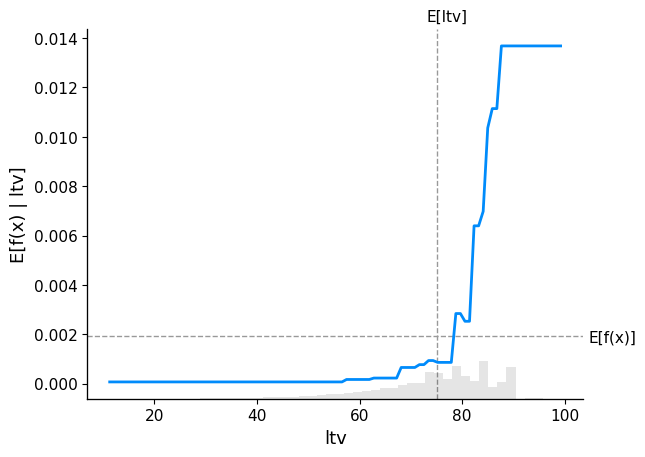

In [238]:
shap.plots.partial_dependence(
"ltv", model.predict, train[train["sample_type"]=="dev"][model.feature_names], 
ice=False, model_expected_value=True, feature_expected_value=True
)

#### SCORECARD


In [242]:
score=train[['loan_default','disbursed_amount','score_xgb','sample_type']]


In [243]:
score.reset_index(inplace=True)

In [244]:
ks(dev=train[train["sample_type"]=="dev"],data=train[train["sample_type"]=="dev"]
   , target="loan_default", prob="score_xgb",bins=100, asc=True)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

    min_prob  max_prob
0   0.022930  0.052175
1   0.052184  0.060914
2   0.060922  0.067537
3   0.067543  0.073370
4   0.073384  0.078690
..       ...       ...
95  0.355833  0.368473
96  0.368502  0.385208
97  0.385214  0.409735
98  0.409883  0.444375
99  0.444391  0.643931

[100 rows x 2 columns]
KS is 21.8% at decile 46


,min_prob,max_prob,events,nonevents,event_rate,nonevent_rate,cum_eventrate,cum_noneventrate,KS
Decile,,,,,,,,,
0,0.022930,0.052175,62,1152,0.25%,1.19%,0.25%,1.19%,0.9
1,0.052184,0.060914,73,1140,0.29%,1.18%,0.54%,2.37%,1.8
2,0.060922,0.067537,76,1137,0.31%,1.18%,0.85%,3.55%,2.7
3,0.067543,0.073370,83,1130,0.33%,1.17%,1.19%,4.72%,3.5
4,0.073384,0.078690,91,1122,0.37%,1.16%,1.55%,5.89%,4.3
...,...,...,...,...,...,...,...,...,...
95,0.355833,0.368473,417,792,1.68%,0.82%,91.94%,97.04%,5.1
96,0.368502,0.385208,426,787,1.72%,0.82%,93.65%,97.86%,4.2
97,0.385214,0.409735,499,714,2.01%,0.74%,95.67%,98.60%,2.9


In [245]:
score['Log_odds'] = np.log((1-score['score_xgb']) /score['score_xgb'])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [247]:
factor = 173
offset = 300

In [248]:
score['Risk_Score'] = score['Log_odds']*factor + offset


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [249]:
score["Risk_Score"] = score["Risk_Score"].astype(int)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [250]:
score["Risk_Score"][score["Risk_Score"]<=300] = 300
score["Risk_Score"][score["Risk_Score"]>=900] = 900


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [252]:
score["Risk_Score"].describe()

count    233154.000000
mean        551.640311
std          98.916988
min         300.000000
25%         481.000000
50%         543.000000
75%         619.000000
max         900.000000
Name: Risk_Score, dtype: float64

In [253]:
dev_score_cutoff = np.flip(get_cutoff(score[score["sample_type"]=="dev"],"loan_default","Risk_Score",10),axis=0)

   min_prob  max_prob
0       300       433
1       434       467
2       468       491
3       492       517
4       518       542
5       543       569
6       570       601
7       602       638
8       639       683
9       684       900



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [254]:
dev_score_cutoff

array([[684, 900],
       [639, 683],
       [602, 638],
       [570, 601],
       [543, 569],
       [518, 542],
       [492, 517],
       [468, 491],
       [434, 467],
       [300, 433]])

In [255]:
score["tiers"]  = pd.Series(np.digitize(score["Risk_Score"],dev_score_cutoff[:,1],right=True).reshape(-1))


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### RISK STRATEGY

In [256]:
## ON 10 deciles
score.groupby("tiers").agg({"disbursed_amount":"sum","loan_default":"sum","UniqueID":"count"})

,disbursed_amount,loan_default,UniqueID
tiers,,,
1,1091768520,1934,22890
2,1095250408,2884,23605
3,1196127045,3513,23584
4,1253789897,4252,23313
5,1287790251,4791,23321
6,1364703817,5467,24252
7,1309485761,5822,23054
8,1279816121,6034,22170
9,1391218293,7107,23557


In [ ]:
## On 20 deciles
score_cutoff = np.flip(get_cutoff(score[score["sample_type"]=="dev"],"loan_default","Risk_Score",20),axis=0)

In [ ]:
score["tiers_on_20"]  = pd.Series(np.digitize(score["Risk_Score"],score_cutoff[:,1],right=True).reshape(-1))

In [ ]:

score.groupby("tiers_on_20").agg({"disbursed_amount":"sum","loan_default":"sum","UniqueID":"count"})